<div style="text-align: center; padding: 20px; font-family: Vazir;">
<h1 align="center" style="font-size: 28px; color:rgb(64, 244, 202); width: 100%;">⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️<br>تمرین سوم<br>⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️</h1>
<h2 style="color:rgb(90, 255, 184); font-size: 20px;">Word2Vec & MLP</h2>
<p align="center" style="color: #666; font-size: 16px;">علی فرتوت</p>
<p align="center" style="color: #666; font-size: 16px; margin-bottom: 30px;">ali.fartout@ut.ac.ir</p>

    
<p align="center" style="color: #666; font-size: 16px;">علیرضا آخوندی</p>
<p align="center" style="color: #666; font-size: 16px; margin-bottom: 30px;">a.akhoundi79@gmail.com</p>

<div dir="rtl" style="border: 2px dashed rgb(90, 255, 184); border-radius: 8px; padding: 20px; margin: 20px auto; max-width: 500px; text-align: right;">
<p style="color: rgb(64, 244, 202); font-size: 18px; margin-bottom: 15px;">📝 مشخصات دانشجو:</p>
<p style="color: #666; margin: 5px;">نام و نام خانوادگی: محمد طاها مجلسی</p>
<p style="color: #666; margin: 5px;">شماره دانشجویی: ۸۱۰۱۰۱۵۰۴</p>
<p style="color: #666; margin: 5px;">تاریخ ارسال: ---------- </p>
</div>
</div>

<div dir="rtl" style="text-align: justify; padding: 25px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
<div style="line-height: 2.0; font-size: 17px; color: black; font-family: Vazir;">

<br>
<div style="padding-right:100px">
📋 <b>ساختار تمرین:</b>
<li><b>سوال اول - <span dir="rtl">سوال اول : پیاده سازی CBOW و Skip-Gram</span> </b></li>
<ul>
<li>بخش اول: بارگذاری داده </li>
<li>بخش دوم: پیش پردازش </li>
<li>بخش سوم: پیاده سازی شبکه و‌ آموزش شبکه</li>
<li>بخش چهارم:مقایسه مدل‌ها</li>
</ul>
<li><b>سوال دوم - <span dir="rtl"> پیاده‌سازی طبقه‌بند اخبار با کمک شبکه عصبی و مدل Fasttext</span> </b></li>
<ul>
<li>بخش اول: بارگذاری داده و پیش پردازش </li>
<li>بخش دوم: Embedding نمونه‌ها </li>
<li>بخش سوم: پیاده سازی شبکه و‌ اموزش شبکه</li>
<li>بخش چهارم: تحلیل نتایج</li>
</ul>
</div>
</div>
<div dir='rtl' style="line-height: 1.8; font-family: Vazir; font-size: 16px; margin-top: 20px; background-color: #e8eaf6; padding: 15px; border-radius: 8px; color:black">
💡 <b>نکات مهم:.</b>
<br>
 💡برای سوال اول باید تمامی بخش ها رو خودتان پیاده سازی کنید . حق استفاده از کتابخانه‌های اماده را ندارید.</div>
</div>

# <div style="text-align: center; direction: rtl; font-family: Vazir;"><h1 align="center" style="font-size: 24px; padding: 20px;">⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️<br>سوال اول : پیاده سازی CBOW و Skip-Gram<br>⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️</h1></div>


<p dir="rtl" style="text-align: right; padding:30px; background-color:rgb(12, 12, 12); border-radius: 12px; color: white; font-family: Vazir;">
در این سوال شما با پیاده سازی دو مدل CBOW و Skipgram آشنا میشوید.
<p dir="rtl" style="padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
</p>
</p>


## <div style="text-align: center; direction: rtl; font-family: Vazir;">بارگذاری داده</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">

ابتدا دیتاست زیر را دانلود کنید.
<a>https://docs.pytorch.org/text/0.8.1/datasets.html#wikitext-2</a>
</div>


<p dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
۳ فایل txt که برای سه مجموعه داده Train, Valid, Test
ذخیره شده باشد.
</p>

## Imports

In [2]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498210 sha256=0c4ad94b988311e9ecc63ea869e973a4ff6c258c3ee19eb6c8b246cd7cde2562
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [3]:
import os
from pathlib import Path
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import re
import torch
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from IPython.display import clear_output
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import fasttext
import fasttext.util
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm


In [4]:

DATASET_NAME = "wikitext"
DATASET_CONFIG = "wikitext-2-raw-v1"
SAVE_DIR = "data/wikitext-2"
SPLITS = ["train", "validation", "test"]

print(f"Loading {DATASET_CONFIG} dataset...")
raw_datasets = load_dataset(DATASET_NAME, DATASET_CONFIG)

os.makedirs(SAVE_DIR, exist_ok=True)

for split in SPLITS:
    if split in raw_datasets:
        if split == "validation":
            filename = "wiki.valid.tokens"
        elif split == "train":
            filename = "wiki.train.tokens"
        else:
            filename = "wiki.test.tokens"

        file_path = os.path.join(SAVE_DIR, filename)
        data_split = raw_datasets[split]
        all_text = '\n'.join(data_split['text'])

        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(all_text)

        print(f"Saved {len(data_split)} entries to {filename}")

train_path = Path(os.path.join(SAVE_DIR, "wiki.train.tokens"))
valid_path = Path(os.path.join(SAVE_DIR, "wiki.valid.tokens"))
test_path = Path(os.path.join(SAVE_DIR, "wiki.test.tokens"))

print(f"\nDataset files created successfully")

Loading wikitext-2-raw-v1 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Saved 36718 entries to wiki.train.tokens
Saved 3760 entries to wiki.valid.tokens
Saved 4358 entries to wiki.test.tokens

Dataset files created successfully


In [5]:


stats = {}
for split_name, file_path in [("Train", train_path), ("Validation", valid_path), ("Test", test_path)]:
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]

    all_text = ' '.join(lines)
    words = all_text.split()

    stats[split_name] = {
        'lines': len(lines),
        'words': len(words),
        'unique_words': len(set(words)),
        'avg_words_per_line': len(words) / len(lines) if lines else 0
    }

    print(f"{split_name}: {len(lines):,} lines, {len(words):,} words, {len(set(words)):,} unique")


Train: 23,767 lines, 2,051,910 words, 76,616 unique
Validation: 2,461 lines, 213,886 words, 19,882 unique
Test: 2,891 lines, 241,211 words, 21,141 unique


### Word Cloud

In [19]:
print("\nSample texts from WikiText datasets:")
for split_name, file_path in [("Train", train_path), ("Validation", valid_path), ("Test", test_path)]:
    print(f"\n{split_name} samples:")
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = [line.strip() for line in f.readlines() if line.strip()][:5]
    for i, line in enumerate(lines, 1):
        print(f"  {i}. {line[:150]}...")


Sample texts from WikiText datasets:

Train samples:
  1. = Valkyria Chronicles III =...
  2. Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chroni...
  3. The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard feature...
  4. It met with positive sales in Japan , and was praised by both Japanese and western critics . After release , it received downloadable content , along ...
  5. = = Gameplay = =...

Validation samples:
  1. = Homarus gammarus =...
  2. Homarus gammarus , known as the European lobster or common lobster , is a species of clawed lobster from the eastern Atlantic Ocean , Mediterranean Se...
  3. = = Description = =...
  4. Homarus gammarus is a large crustacean , with a body length up to 60 centimetres ( 24 in ) and weighing up to 5 – 6 kilograms ( 11 – 13 lb ) , althoug...
  5. The fir

### Word Cloud

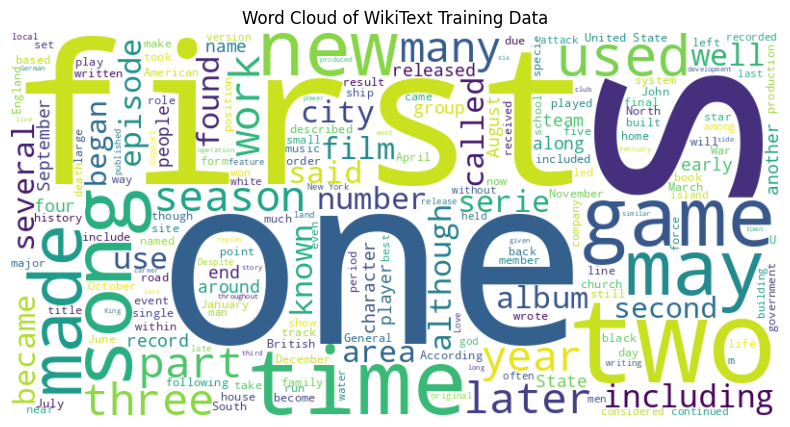

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from WikiText training data
with open(train_path, 'r', encoding='utf-8') as f:
    text = f.read()

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of WikiText Training Data')
plt.show()

### Top Frequent Words

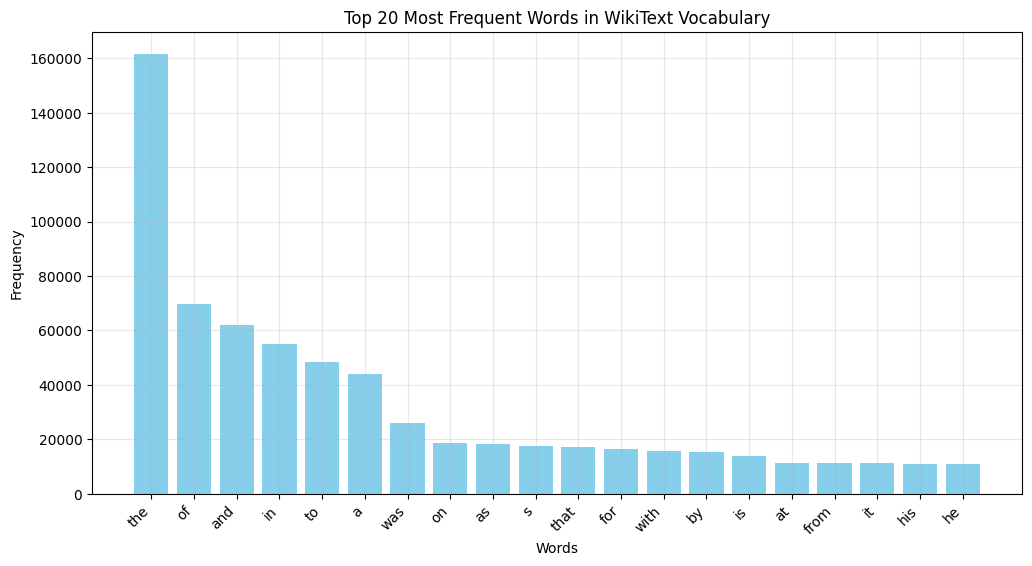

In [91]:
import matplotlib.pyplot as plt

# Get top 20 frequent words from vocabulary
top_words = vocab.word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in WikiText Vocabulary')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

## <div style="text-align: center; direction: rtl; font-family: Vazir;">پیش پردازش</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
<p style="line-height: 1.8; text-align: right;">
بعد از انکه داده را بارگذاری کردید. تمامی مراحل زیر را خودتان پیاده‌سازی کرده و پیش پردازش های گفته شده را انجام دهید
<br>

بخش اول) یک تابعی که مراحل زیر را انجام دهد:
‌<br>
‍۱) تمامی کلمات را lowercase شود
‌<br>
۲)Special Characters حذف شوند
‌<br>
۳)کلمات در هر space (فاصله) از هم جدا و توکن شوند
‌<br>


بخش دوم)  
۱)شمارش فرکانس (Frequency Counting): تعداد تکرار هر کلمه در تمام متن‌ها را حساب کنید
‌<br>
۲)فیلتر کردن کلمات نادر (Min Frequency Filtering): فقط کلماتی که بیشتر از min_freq بار تکرار شده‌اند را نگه دارید
‌<br>
۳)اضافه کردن توکن خاص <unk>: برای کلمات ناشناخته یا نادر
‌<br>
۴)ایجاد دیکشنری دوطرفه:
‌<br>
word → index (string to index)
‌<br>
index → word (index to string)


بخش سوم)
<br>
۱) تابعی بنویسید که از یک جمله، نمونه‌های آموزشی CBOW تولید کند
<br>
۲)تابعی بنویسید که از یک جمله، نمونه‌های آموزشی Skip-gram تولید کند
<br>
<b>بخش سوم را توضیح بدهید</b>

<b>نکته: برای خوانایی در کد به جای پیاده سازی معمولی دو تابع،  میتوایند دو تابع گفته شده بالا را برای collate_fn پایتورچ پیاده‌سازی کنید.</b>

<a>https://discuss.pytorch.org/t/custom-collate-function/145823</a>
<br>
بخش چهارم)
<br>
در آخر داده پردازش شده را در dataloader لود کنید.
</p>
</div>


<p dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
به عنوان مثال
<br>
برای بخش اول
"Hello World! This is a TEST sentence, with 123 numbers."
به عوان ورودی
["hello", "world", "this", "is", "a", "test", "sentence", "with", "123", "numbers"]
شود

<br>
برای بخش دوم
<br>
ورودی:
texts = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs"
]
min_freq = 2
<br>
خروجی:
<br>
Vocabulary:
{
    "<unk>": 0,
    "the": 1,
    "sat": 2,
    "on": 3,
    "cat": 4,
    "dog": 5
}
</p>


<div dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
✍️ <b>پاسخ تشریحی:</b><br>

<b>توضیح بخش سوم - تولید نمونه‌های آموزشی:</b>

<b>CBOW (Continuous Bag of Words):</b>
در این روش، از کلمات اطراف (context) برای پیش‌بینی کلمه مرکزی استفاده می‌کنیم. برای مثال با window_size=2، اگر جمله "the cat sat on the" باشد:
- برای کلمه "sat" (مرکز)، کلمات context عبارتند از: ["the", "cat", "on", "the"]
- ورودی: میانگین یا مجموع embedding کلمات context
- خروجی: کلمه مرکزی "sat"

<b>Skip-gram:</b>
برعکس CBOW، از کلمه مرکزی برای پیش‌بینی کلمات اطراف استفاده می‌کنیم. برای همان مثال:
- ورودی: کلمه "sat"
- خروجی: هر یک از کلمات context به صورت جداگانه ["the", "cat", "on", "the"]
- پس برای هر کلمه مرکزی، چندین نمونه آموزشی تولید می‌شود

<b>استفاده از collate_fn:</b>
از collate_fn در DataLoader استفاده می‌کنیم تا batch‌های داده را به فرمت مناسب تبدیل کنیم. این تابع لیستی از نمونه‌ها را می‌گیرد و آنها را به tensor‌های مناسب برای آموزش شبکه تبدیل می‌کند.
</div>

In [20]:

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return tokens

test_sentence = "Hello World! This is a TEST sentence, with 123 numbers."
print("Input:", test_sentence)
print("Output:", preprocess_text(test_sentence))

Input: Hello World! This is a TEST sentence, with 123 numbers.
Output: ['hello', 'world', 'this', 'is', 'a', 'test', 'sentence', 'with', '123', 'numbers']


In [21]:


class Vocabulary:
    def __init__(self, min_freq=2):
        self.min_freq = min_freq
        self.word2idx = {}
        self.idx2word = {}
        self.word_freq = Counter()

    def build_vocab(self, texts):
        self.word_freq.clear()
        for text in texts:
            tokens = preprocess_text(text)
            self.word_freq.update(tokens)

        self.word2idx = {"<unk>": 0}
        idx = 1
        for word, freq in self.word_freq.items():
            if freq >= self.min_freq:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1

        self.idx2word[0] = "<unk>"
        print(f"Vocabulary built with {len(self.word2idx)} words (min_freq={self.min_freq})")
        return self

    def encode(self, word):
        return self.word2idx.get(word, 0)

    def decode(self, idx):
        return self.idx2word.get(idx, "<unk>")

    def __len__(self):
        return len(self.word2idx)

In [22]:


texts = ["the cat sat on the mat", "the dog sat on the log", "cats and dogs"]
vocab_test = Vocabulary(min_freq=2)
vocab_test.build_vocab(texts)
print("Vocabulary:", {word: idx for word, idx in list(vocab_test.word2idx.items())[:10]})


Vocabulary built with 4 words (min_freq=2)
Vocabulary: {'<unk>': 0, 'the': 1, 'sat': 2, 'on': 3}


In [23]:

class Word2VecDataset(Dataset):
    def __init__(self, file_path, vocab, window_size=2, model_type='cbow'):
        self.vocab = vocab
        self.window_size = window_size
        self.model_type = model_type
        self.samples = []

        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                tokens = preprocess_text(line.strip())

                if len(tokens) < window_size * 2 + 1:
                    continue

                token_ids = [vocab.encode(token) for token in tokens]

                if model_type == 'cbow':
                    self.samples.extend(self._generate_cbow_samples(token_ids))
                else:
                    self.samples.extend(self._generate_skipgram_samples(token_ids))

    def _generate_cbow_samples(self, token_ids):
        samples = []
        for i in range(self.window_size, len(token_ids) - self.window_size):
            context = []
            for j in range(i - self.window_size, i + self.window_size + 1):
                if j != i:
                    context.append(token_ids[j])
            target = token_ids[i]
            samples.append((context, target))
        return samples

    def _generate_skipgram_samples(self, token_ids):
        samples = []
        for i in range(self.window_size, len(token_ids) - self.window_size):
            center = token_ids[i]
            for j in range(i - self.window_size, i + self.window_size + 1):
                if j != i:
                    context = token_ids[j]
                    samples.append((center, context))
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [24]:


def collate_cbow(batch):
    contexts = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    contexts = torch.LongTensor(contexts)
    targets = torch.LongTensor(targets)
    return contexts, targets

def collate_skipgram(batch):
    centers = [item[0] for item in batch]
    contexts = [item[1] for item in batch]
    centers = torch.LongTensor(centers)
    contexts = torch.LongTensor(contexts)
    return centers, contexts

In [25]:
all_texts = []
for file_path in [train_path, valid_path, test_path]:
    with open(file_path, 'r', encoding='utf-8') as f:
        all_texts.extend(f.readlines())

vocab = Vocabulary(min_freq=5)
vocab.build_vocab(all_texts)

print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {list(vocab.word2idx.keys())[:20]}\\n")

Vocabulary built with 23522 words (min_freq=5)
Vocabulary size: 23522
Sample words: ['<unk>', 'valkyria', 'chronicles', 'iii', 'senj', 'no', '3', 'japanese', 'lit', 'of', 'the', 'battlefield', 'commonly', 'referred', 'to', 'as', 'outside', 'japan', 'is', 'a']\n


In [26]:

train_dataset_cbow = Word2VecDataset(train_path, vocab, window_size=2, model_type='cbow')
valid_dataset_cbow = Word2VecDataset(valid_path, vocab, window_size=2, model_type='cbow')
test_dataset_cbow = Word2VecDataset(test_path, vocab, window_size=2, model_type='cbow')

train_loader_cbow = DataLoader(train_dataset_cbow, batch_size=32000, shuffle=True, collate_fn=collate_cbow)
valid_loader_cbow = DataLoader(valid_dataset_cbow, batch_size=32000, shuffle=False, collate_fn=collate_cbow)
test_loader_cbow = DataLoader(test_dataset_cbow, batch_size=32000, shuffle=False, collate_fn=collate_cbow)
print(f"CBOW samples - Train: {len(train_dataset_cbow):,}, Valid: {len(valid_dataset_cbow):,}, Test: {len(test_dataset_cbow):,}\\n")


CBOW samples - Train: 1,666,558, Valid: 174,727, Test: 196,274\n


In [27]:





train_dataset_sg = Word2VecDataset(train_path, vocab, window_size=2, model_type='skipgram')
valid_dataset_sg = Word2VecDataset(valid_path, vocab, window_size=2, model_type='skipgram')
test_dataset_sg = Word2VecDataset(test_path, vocab, window_size=2, model_type='skipgram')

train_loader_sg = DataLoader(train_dataset_sg, batch_size=32000, shuffle=True, collate_fn=collate_skipgram)
valid_loader_sg = DataLoader(valid_dataset_sg, batch_size=32000, shuffle=False, collate_fn=collate_skipgram)
test_loader_sg = DataLoader(test_dataset_sg, batch_size=32000, shuffle=False, collate_fn=collate_skipgram)



In [28]:
print(f"Skip-gram samples - Train: {len(train_dataset_sg):,}, Valid: {len(valid_dataset_sg):,}, Test: {len(test_dataset_sg):,}")


Skip-gram samples - Train: 6,666,232, Valid: 698,908, Test: 785,096


## <div style="text-align: center; direction: rtl; font-family: Vazir;">پیاده‌سازی شبکه و آموزش شبکه</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
<p style="line-height: 1.8; text-align: right;">
حال شبکه‌های SkipGram و CBOW را مانند مقاله (یا کتاب درسی) پیاده سازی کنید </p>
شبکه را آموزش دهید و برای دادگان Train, Validation & Test نمودار خطا ترسیم کنید.
</div>


In [29]:


class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

        nn.init.xavier_uniform_(self.embeddings.weight)
        nn.init.xavier_uniform_(self.linear.weight)

    def forward(self, context):
        embeds = self.embeddings(context)
        embeds = torch.mean(embeds, dim=1)
        out = self.linear(embeds)
        return out

In [30]:


class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

        nn.init.xavier_uniform_(self.embeddings.weight)
        nn.init.xavier_uniform_(self.linear.weight)

    def forward(self, center):
        embeds = self.embeddings(center)
        out = self.linear(embeds)
        return out

In [89]:


def train_model_with_visualization(model, train_loader, valid_loader, test_loader, epochs=20, lr=0.001, device='cpu', model_name='Model'):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses, valid_losses, test_losses = [], [], []
    epoch_times = []
    best_valid_loss = float('inf')
    patience_counter = 0
    max_patience = 5

    print(f"Training {model_name}...")
    print(f"{'='*70}")
    start_time = time.time()

    plt.ion()
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for epoch in range(epochs):
        epoch_start = time.time()

        model.train()
        train_loss = 0
        batch_losses = []

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]",
        leave=False, ncols=100, colour='blue')

        for inputs, targets in pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            batch_loss = loss.item()
            train_loss += batch_loss
            batch_losses.append(batch_loss)

            pbar.set_postfix({'batch_loss': f'{batch_loss:.4f}'})
            pbar.set_postfix({'batch_loss': f'{batch_loss:.4f}'})

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        model.eval()
        valid_loss = 0
        with torch.no_grad():
            for inputs, targets in valid_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                valid_loss += loss.item()
        avg_valid_loss = valid_loss / len(valid_loader)
        valid_losses.append(avg_valid_loss)

        scheduler.step(avg_valid_loss)
        current_lr = optimizer.param_groups[0]['lr']

        if avg_valid_loss < best_valid_loss:
            best_valid_loss = avg_valid_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1

        test_loss = 0
        with torch.no_grad():
            test_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item()
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        epoch_time = time.time() - epoch_start
        epoch_times.append(epoch_time)

        clear_output(wait=True)

        axes[0].clear()
        axes[0].plot(train_losses, label='Train', linewidth=2.5, color='#2E86AB', marker='o')
        axes[0].plot(valid_losses, label='Valid', linewidth=2.5, color='#F18F01', marker='s')
        axes[0].plot(test_losses, label='Test', linewidth=2.5, color='#C73E1D', marker='^')
        axes[0].axhline(y=best_valid_loss, color='green', linestyle='--', linewidth=2, alpha=0.5, label=f'Best Valid: {best_valid_loss:.4f}')
        axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
        axes[0].set_title(f'{model_name} - Loss Progress', fontsize=14, fontweight='bold')
        axes[0].legend(fontsize=10)
        axes[0].grid(True, alpha=0.3)
        axes[0].set_facecolor('#f8f9fa')

        axes[1].clear()
        axes[1].clear()
        recent_batches = batch_losses[-50:] if len(batch_losses) > 50 else batch_losses
        axes[1].plot(recent_batches, linewidth=2, color='#6A4C93', alpha=0.7)
        axes[1].axhline(y=avg_train_loss, color='red', linestyle='--', linewidth=2, label=f'Epoch Avg: {avg_train_loss:.4f}')
        axes[1].set_xlabel('Recent Batches', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Batch Loss', fontsize=12, fontweight='bold')
        axes[1].set_title(f'Epoch {epoch+1} - Batch Loss Detail', fontsize=14, fontweight='bold')
        axes[1].legend(fontsize=11)
        axes[1].grid(True, alpha=0.3)
        axes[1].set_facecolor('#f8f9fa')

        axes[2].clear()
        if len(valid_losses) > 0:
            gap = [v - t for v, t in zip(valid_losses, train_losses)]
            axes[2].plot(gap, linewidth=2.5, color='#E63946', marker='o')
            axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
            axes[2].fill_between(range(len(gap)), gap, alpha=0.3, color='#E63946')
        axes[2].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        axes[2].set_ylabel('Valid - Train Loss', fontsize=12, fontweight='bold')
        axes[2].set_title('Generalization Gap (Overfitting Monitor)', fontsize=14, fontweight='bold')
        axes[2].grid(True, alpha=0.3)
        axes[2].set_facecolor('#f8f9fa')

        plt.tight_layout()
        plt.draw()
        plt.pause(0.01)

        improvement = "↑" if len(valid_losses) > 1 and avg_valid_loss < valid_losses[-2] else "↓"
        print(f"\nTraining {model_name}")
        print(f"{'='*70}")
        print(f"Epoch {epoch+1:2d}/{epochs}")
        print(f"  Train Loss: {avg_train_loss:.4f}")
        print(f"  Valid Loss: {avg_valid_loss:.4f} {improvement}")
        print(f"  Test Loss:  {avg_test_loss:.4f}")
        print(f"  Best Valid: {best_valid_loss:.4f}")
        print(f"  Learning Rate: {current_lr:.6f}")
        print(f"  Time: {epoch_time:.1f}s")
        print(f"  Patience: {patience_counter}/{max_patience}")
        print(f"  Progress: [{'█' * int((epoch+1)/epochs*30)}{' ' * (30-int((epoch+1)/epochs*30))}] {(epoch+1)/epochs*100:.1f}%")
        print(f"{'='*70}")

        if patience_counter >= max_patience:
            print(f"\nEarly stopping triggered! No improvement for {max_patience} epochs.")
            print(f"Loading best model (valid loss: {best_valid_loss:.4f})")
            model.load_state_dict(best_model_state)
            break

    plt.ioff()
    plt.savefig(f'{model_name.lower()}_training_live.png', dpi=300, bbox_inches='tight')
    plt.show()

    total_time = time.time() - start_time
    print(f"\n{model_name} training completed!")
    print(f"  Total time: {total_time:.1f}s")
    print(f"  Epochs trained: {len(train_losses)}")
    print(f"  Average time per epoch: {total_time/len(train_losses):.1f}s")
    print(f"  Final train loss: {train_losses[-1]:.4f}")
    print(f"  Final valid loss: {valid_losses[-1]:.4f}")
    print(f"  Final test loss: {test_losses[-1]:.4f}")
    print(f"  Best valid loss: {best_valid_loss:.4f}")
    print(f"  Loss reduction: {train_losses[0] - train_losses[-1]:.4f} ({(train_losses[0] - train_losses[-1])/train_losses[0]*100:.1f}%)")
    print()

    return train_losses, valid_losses, test_losses, epoch_times


### Word2Vec Training Configuration

This section sets up the hyperparameters for training the Word2Vec models:
- **Embedding Dimension**: 100 (size of word vectors)
- **Epochs**: 20 (number of training iterations)
- **Learning Rate**: 0.001 (step size for optimization)
- **Device**: Automatically selects GPU if available, otherwise CPU

In [39]:

embedding_dim = 100
epochs = 20
lr = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"\nTraining Configuration:")
print(f"Device: {device}, Vocab: {len(vocab):,}, Embedding: {embedding_dim}, Epochs: {epochs}, LR: {lr}\n")




Training Configuration:
Device: cuda, Vocab: 23,522, Embedding: 100, Epochs: 20, LR: 0.001



### Training Skip-gram Model

Training the Skip-gram model. Skip-gram predicts context words based on a target word. This model performs well on rare words and captures semantic relationships better than CBOW.

In [ ]:
cbow_model = CBOW(len(vocab), embedding_dim)
cbow_train_losses, cbow_valid_losses, cbow_test_losses, cbow_times = train_model_with_visualization(
    cbow_model, train_loader_cbow, valid_loader_cbow, test_loader_cbow,
    epochs=100, lr=lr, device=device, model_name='CBOW'
)

<Figure size 640x480 with 0 Axes>


Training CBOW
Epoch 19/20
  Train Loss: 6.8994
  Valid Loss: 6.9980 ↑
  Test Loss:  7.0341
  Best Valid: 6.9980
  Learning Rate: 0.001000
  Time: 17.3s
  Patience: 0/5
  Progress: [████████████████████████████  ] 95.0%


Epoch 20/20 [Train]:  66%|███████████████▏       | 35/53 [00:10<00:05,  3.30it/s, batch_loss=6.8641]

### Training CBOW Model

Training the Continuous Bag of Words (CBOW) model. CBOW predicts a target word based on its context words. This model is efficient for frequent words and learns distributed representations of words.

In [41]:
skipgram_model = SkipGram(len(vocab), embedding_dim)
sg_train_losses, sg_valid_losses, sg_test_losses, sg_times = train_model_with_visualization(
    skipgram_model, train_loader_sg, valid_loader_sg, test_loader_sg,
    epochs=epochs, lr=lr, device=device, model_name='Skip-gram'
)

<Figure size 640x480 with 0 Axes>


Training Skip-gram
Epoch 20/20
  Train Loss: 6.8556
  Valid Loss: 7.0163 ↑
  Test Loss:  7.0569
  Best Valid: 7.0163
  Learning Rate: 0.001000
  Time: 65.0s
  Patience: 0/5
  Progress: [██████████████████████████████] 100.0%


<Figure size 640x480 with 0 Axes>


Skip-gram training completed!
  Total time: 1302.0s
  Epochs trained: 20
  Average time per epoch: 65.1s
  Final train loss: 6.8556
  Final valid loss: 7.0163
  Final test loss: 7.0569
  Best valid loss: 7.0163
  Loss reduction: 1.7932 (20.7%)



### Word2Vec Models Comparison

Comparing the performance of CBOW and Skip-gram models. This includes loss curves, test performance, and training time analysis to determine which model learned better embeddings.

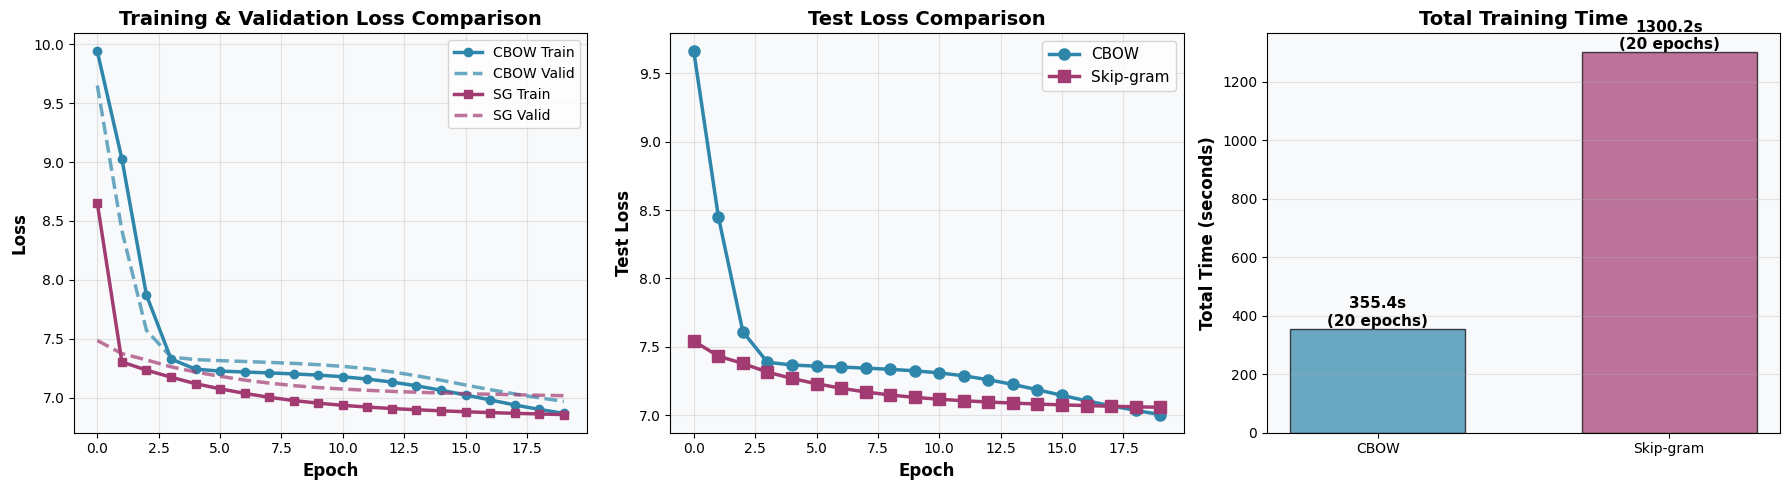

\nCBOW: Train=6.8657, Valid=6.9676, Test=7.0034


In [42]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(cbow_train_losses, label='CBOW Train', linewidth=2.5, color='#2E86AB', marker='o')
axes[0].plot(cbow_valid_losses, label='CBOW Valid', linewidth=2.5, color='#2E86AB', linestyle='--', alpha=0.7)
axes[0].plot(sg_train_losses, label='SG Train', linewidth=2.5, color='#A23B72', marker='s')
axes[0].plot(sg_valid_losses, label='SG Valid', linewidth=2.5, color='#A23B72', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Training & Validation Loss Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

axes[1].plot(cbow_test_losses, label='CBOW', linewidth=2.5, marker='o', color='#2E86AB', markersize=8)
axes[1].plot(sg_test_losses, label='Skip-gram', linewidth=2.5, marker='s', color='#A23B72', markersize=8)
axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Test Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Test Loss Comparison', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

total_cbow_time = np.sum(cbow_times)
total_sg_time = np.sum(sg_times)
axes[2].bar(['CBOW', 'Skip-gram'],
            [total_cbow_time, total_sg_time],
            color=['#2E86AB', '#A23B72'], edgecolor='black', alpha=0.7, width=0.6)
axes[2].set_ylabel('Total Time (seconds)', fontsize=12, fontweight='bold')
axes[2].set_title('Total Training Time', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
for i, (name, time_val) in enumerate(zip(['CBOW', 'Skip-gram'], [total_cbow_time, total_sg_time])):
    axes[2].text(i, time_val, f'{time_val:.1f}s\n({len(cbow_times if i==0 else sg_times)} epochs)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
axes[2].set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('word2vec_final_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


print(f"\\nCBOW: Train={cbow_train_losses[-1]:.4f}, Valid={cbow_valid_losses[-1]:.4f}, Test={cbow_test_losses[-1]:.4f}")

## <div style="text-align: center; direction: rtl; font-family: Vazir;">مقایسه شبکه‌ها</div>


<div dir="rtl" style="text-align: right; padding: 15px; background-color: #f5f5f5; border-radius: 12px; border: 2px solid #022216; font-family: Vazir; line-height: 1.8; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<h3 style="color: #022216; margin-top: 0;">دستورالعمل تحلیل شباهت واژگان</h3>

<ol style="padding-right: 20px;">
    <li><strong>انتخاب واژه‌ها:</strong> ۵ واژه به دلخواه انتخاب نمایید.</li>
    <li><strong>یافتن واژگان مشابه:</strong> برای هر واژه و هر مدل، با استفاده از معیار <em>Cosine Similarity</em>، ۵ واژه برتر مشابه را استخراج کنید.</li>
    <li><strong>نمایش بصری:</strong> واژگان مشابه را با استفاده از روش <em>t-SNE</em> به صورت نمودار نمایش دهید (برای هر واژه و هر مدل یک نمودار جداگانه).</li>
    <li><strong>تحلیل مقایسه‌ای:</strong> نمودارهای تولید شده را برای دو مدل مختلف با یکدیگر مقایسه کنید.</li>
</ol>

<p style="color: #4b5563; font-size: 0.9em; margin-bottom: 0;">
    نکته: در هر نمودار t-SNE می‌بایست واژه اصلی به همراه ۵ واژه مشابه آن نمایش داده شود.
</p>
</div>

In [43]:

def find_similar_words(word, model, vocab, top_k=5):
    if word not in vocab.word2idx:
        print(f"Word '{word}' not found in vocabulary")
        return []

    word_idx = vocab.encode(word)
    word_embedding = model.embeddings.weight[word_idx].detach().cpu().numpy().reshape(1, -1)

    all_embeddings = model.embeddings.weight.detach().cpu().numpy()
    similarities = cosine_similarity(word_embedding, all_embeddings)[0]

    top_indices = similarities.argsort()[-top_k-1:-1][::-1]

    similar_words = []
    for idx in top_indices:
        if idx != word_idx:
            similar_words.append((vocab.decode(idx), similarities[idx]))

    return similar_words[:top_k]


In [44]:


def plot_tsne(word, model, vocab, top_k=5, title=""):
    if word not in vocab.word2idx:
        print(f"Word '{word}' not found in vocabulary")
        return

    similar_words = find_similar_words(word, model, vocab, top_k)

    word_idx = vocab.encode(word)
    indices = [word_idx] + [vocab.encode(w[0]) for w in similar_words]
    embeddings = model.embeddings.weight[indices].detach().cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(indices)-1))
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))

    plt.scatter(embeddings_2d[0, 0], embeddings_2d[0, 1],
                c='red', s=300, marker='*', edgecolors='black', linewidth=2,
                label='Target Word', zorder=3)
    plt.annotate(word, (embeddings_2d[0, 0], embeddings_2d[0, 1]),
                fontsize=14, fontweight='bold', ha='center',
                xytext=(0, 10), textcoords='offset points')

    for i in range(1, len(embeddings_2d)):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1],
                   c='blue', s=200, alpha=0.6, edgecolors='black', linewidth=1)
        plt.annotate(vocab.decode(indices[i]),
                    (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                    fontsize=11, ha='center',
                    xytext=(0, 8), textcoords='offset points')

    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('t-SNE Dimension 1', fontsize=12)
    plt.ylabel('t-SNE Dimension 2', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()


### t-SNE Visualization


Word: king
--------------------------------------------------------------------------------

CBOW Model - Similar Words:
  1. general         (similarity: 0.9856)
  2. teresa          (similarity: 0.9856)
  3. eleanor         (similarity: 0.9853)
  4. goose           (similarity: 0.9841)
  5. tuozhou         (similarity: 0.9837)

Skip-gram Model - Similar Words:
  1. henry           (similarity: 0.8753)
  2. edward          (similarity: 0.8697)
  3. queen           (similarity: 0.8648)
  4. pope            (similarity: 0.8546)
  5. charles         (similarity: 0.8130)


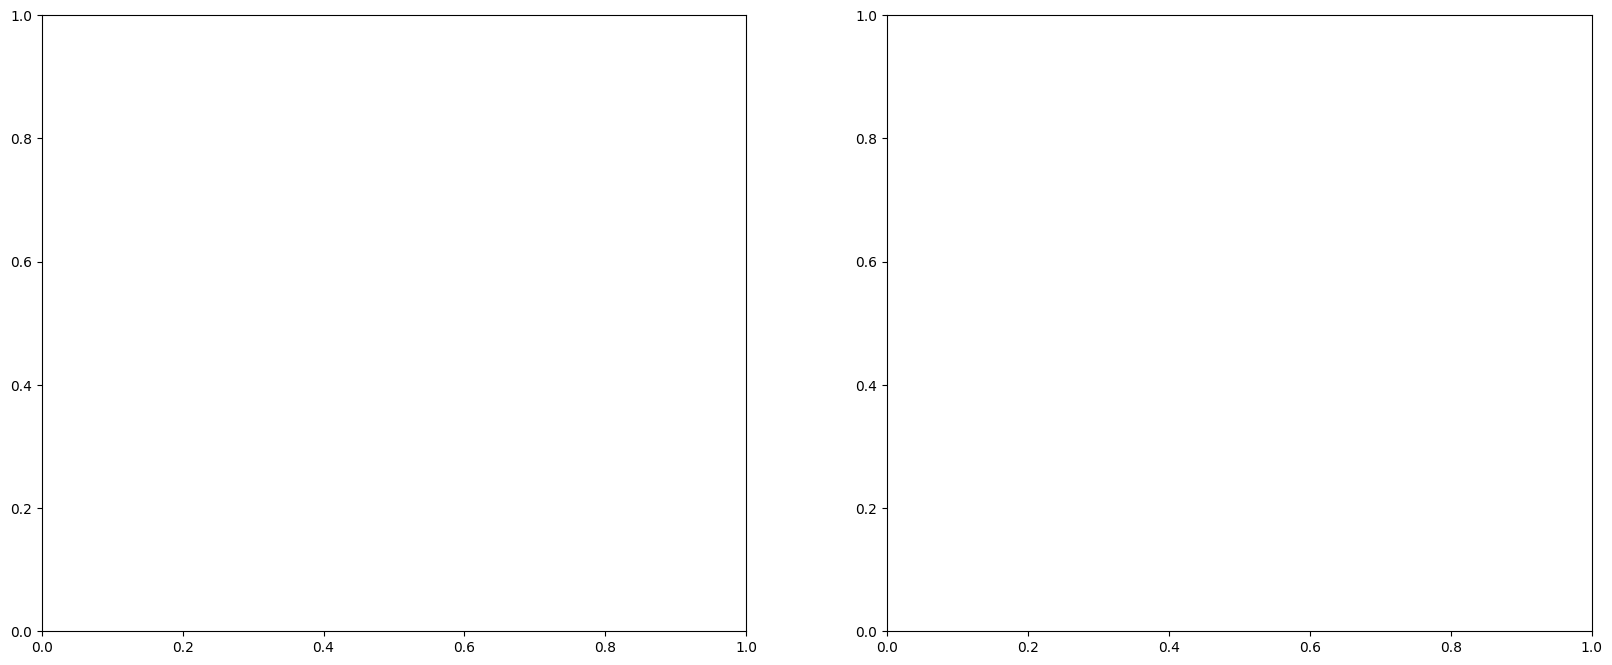

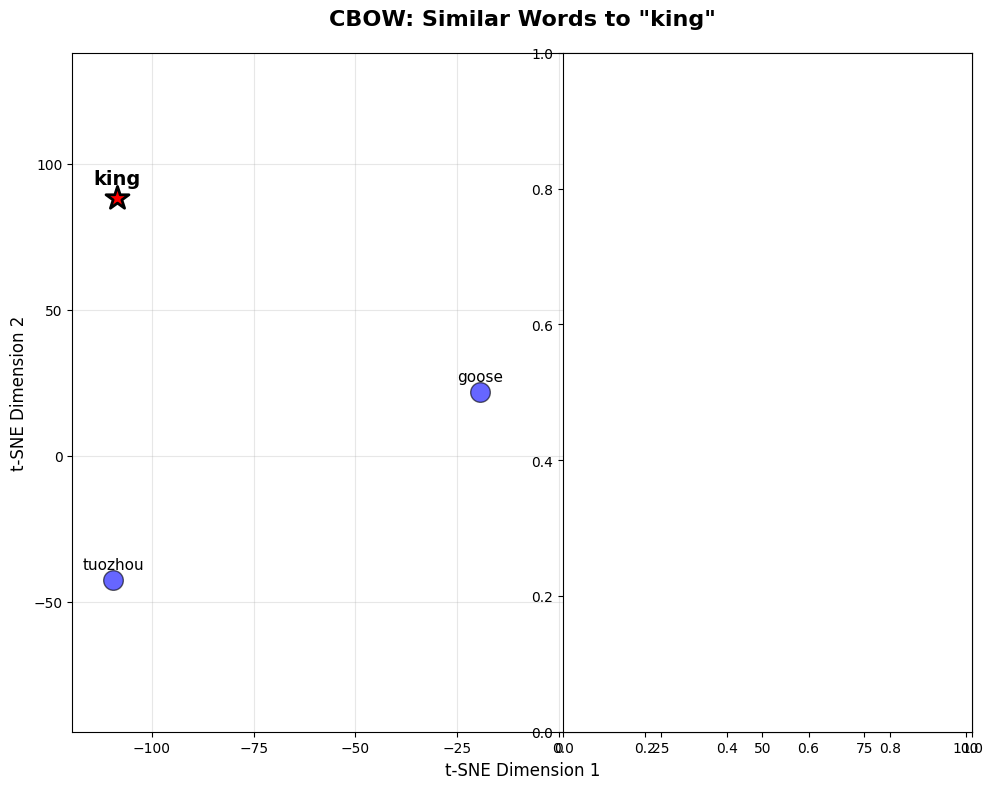

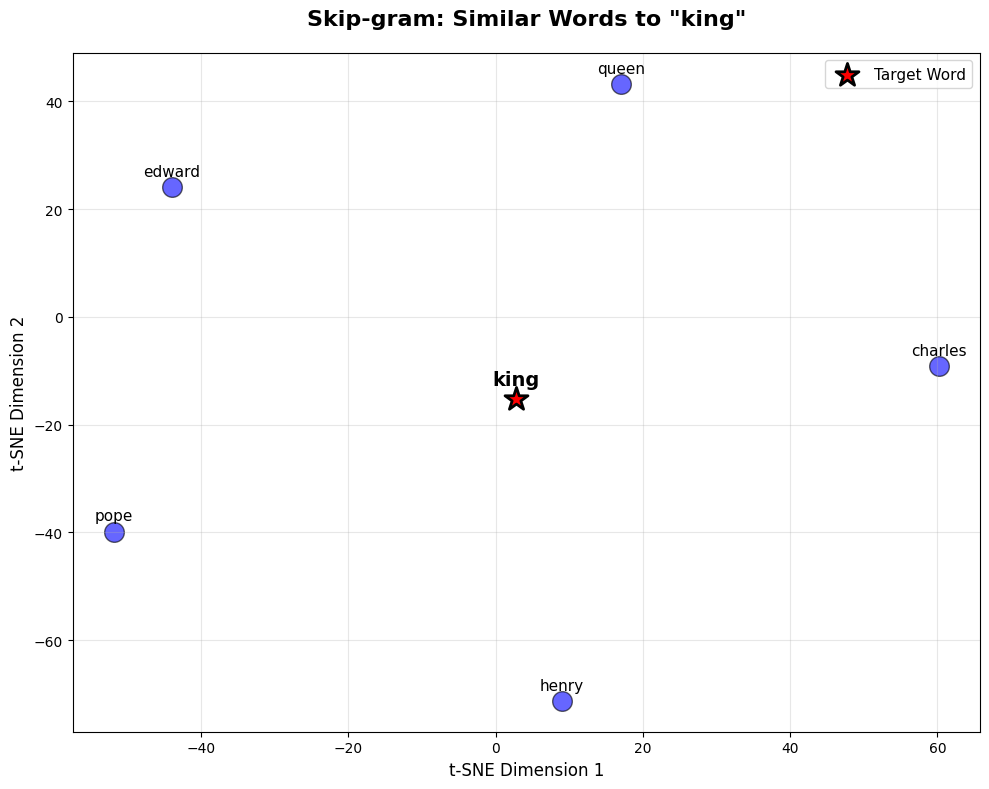



Word: computer
--------------------------------------------------------------------------------

CBOW Model - Similar Words:
  1. racing          (similarity: 0.9969)
  2. spider          (similarity: 0.9967)
  3. discerning      (similarity: 0.9966)
  4. poets           (similarity: 0.9964)
  5. wine            (similarity: 0.9963)

Skip-gram Model - Similar Words:
  1. rhythm          (similarity: 0.8760)
  2. gaming          (similarity: 0.8737)
  3. drama           (similarity: 0.8688)
  4. animated        (similarity: 0.8686)
  5. adventure       (similarity: 0.8661)


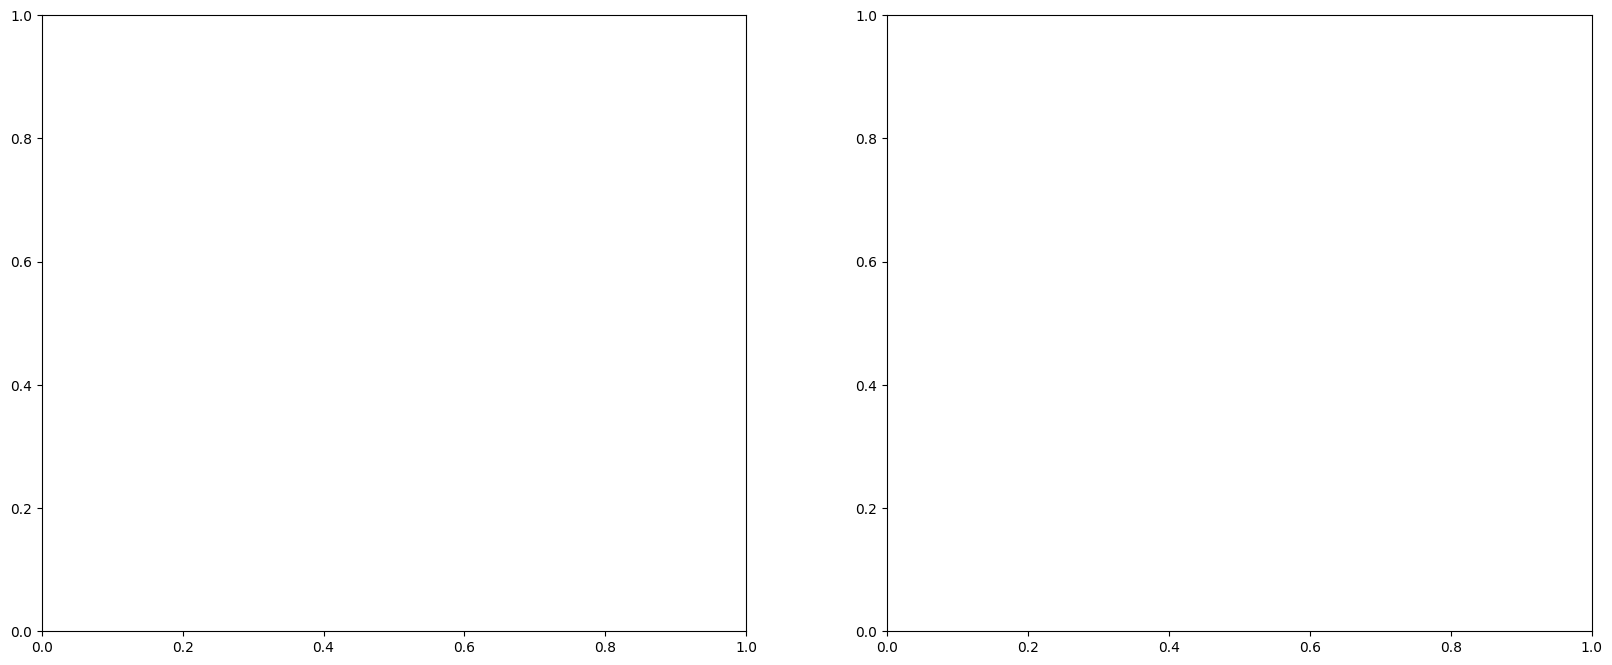

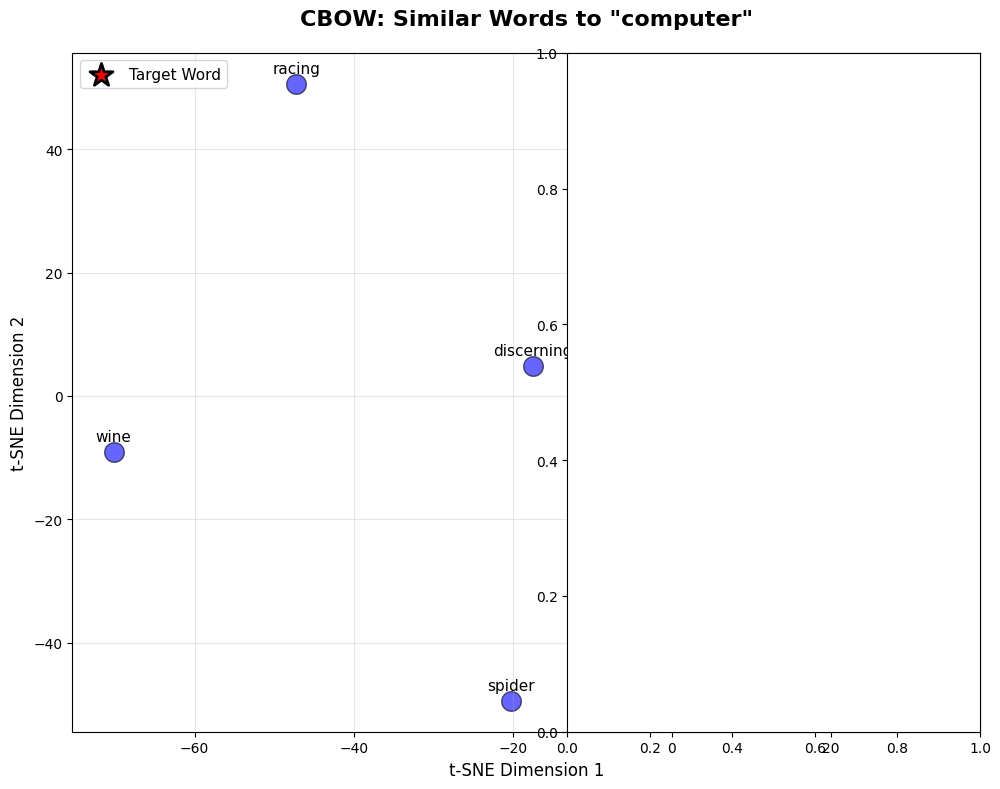

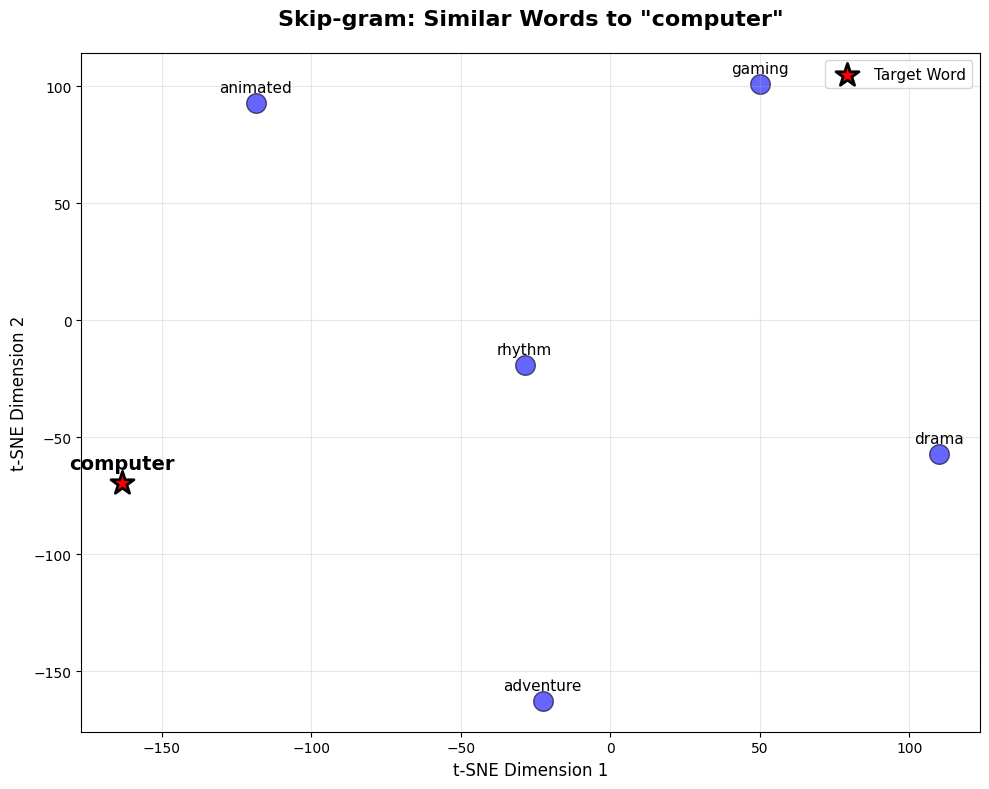



Word: good
--------------------------------------------------------------------------------

CBOW Model - Similar Words:
  1. colloquially    (similarity: 0.9911)
  2. extremely       (similarity: 0.9907)
  3. fool            (similarity: 0.9904)
  4. queries         (similarity: 0.9887)
  5. perfectly       (similarity: 0.9885)

Skip-gram Model - Similar Words:
  1. bad             (similarity: 0.8439)
  2. fun             (similarity: 0.8372)
  3. perfect         (similarity: 0.8245)
  4. something       (similarity: 0.8236)
  5. very            (similarity: 0.8203)


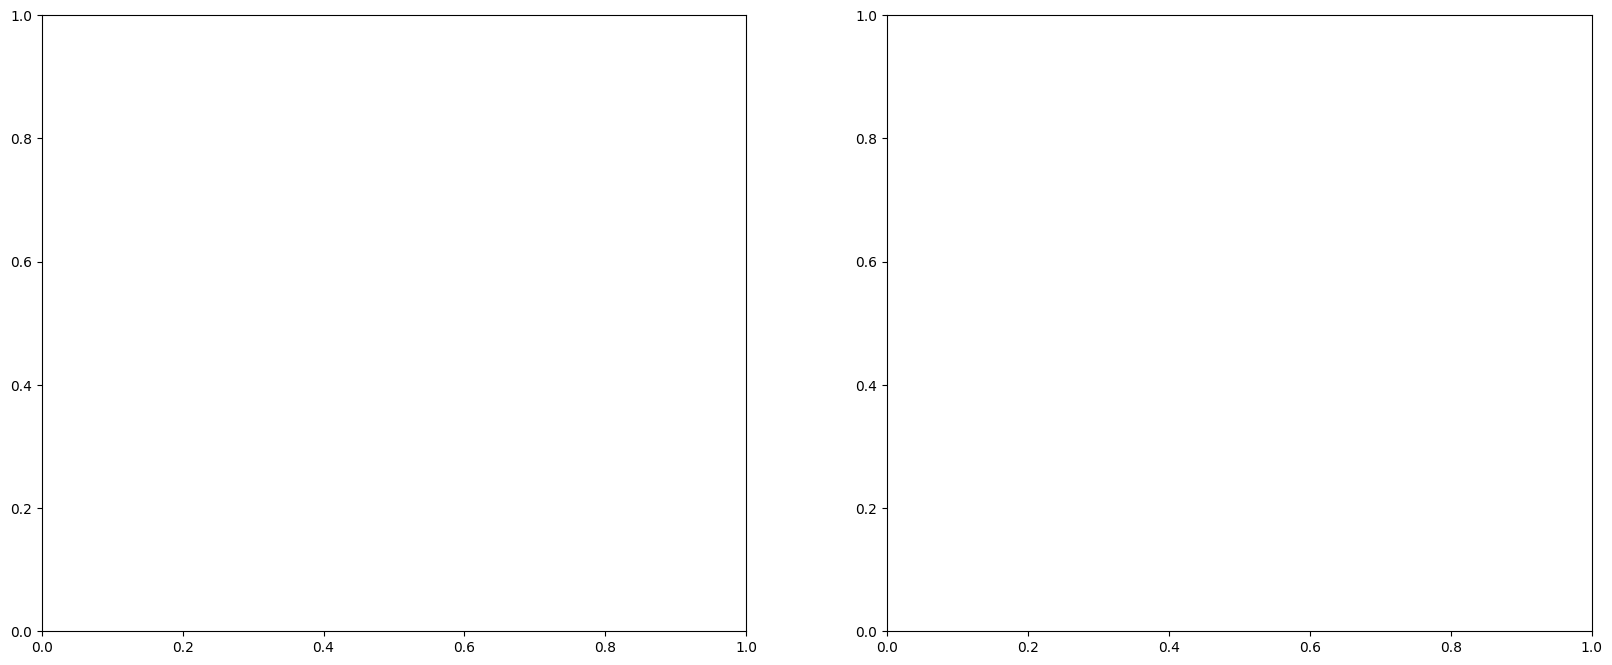

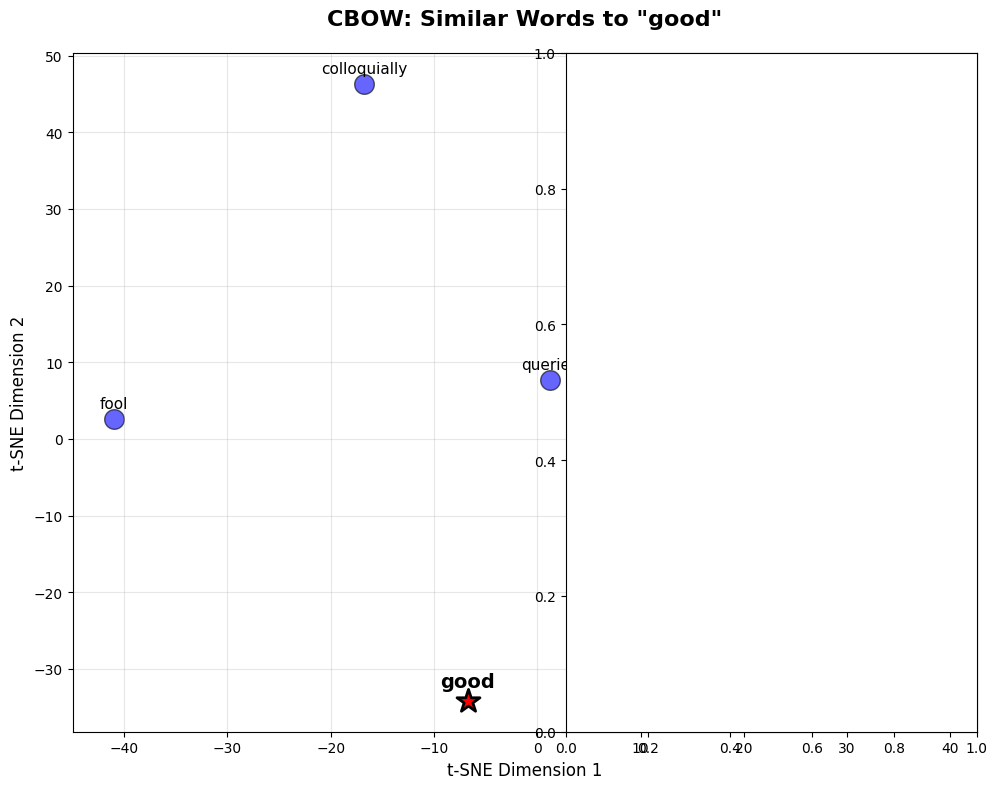

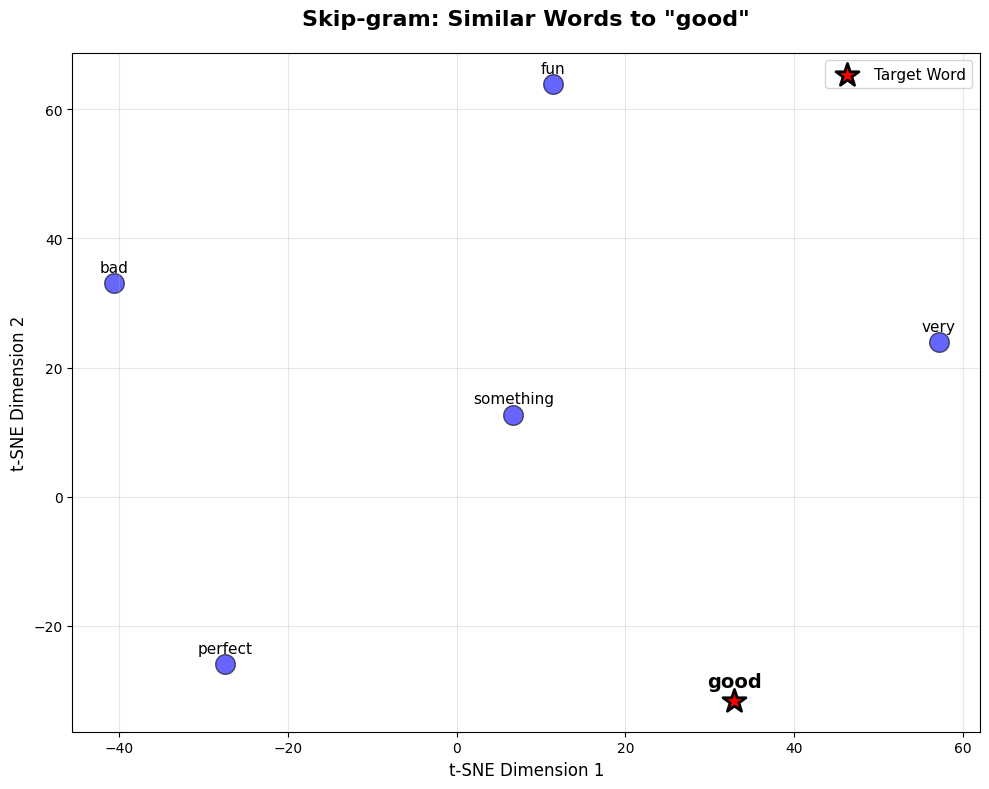



Word: time
--------------------------------------------------------------------------------

CBOW Model - Similar Words:
  1. point           (similarity: 0.9831)
  2. period          (similarity: 0.9829)
  3. start           (similarity: 0.9810)
  4. release         (similarity: 0.9798)
  5. phase           (similarity: 0.9783)

Skip-gram Model - Similar Words:
  1. phase           (similarity: 0.6662)
  2. start           (similarity: 0.6551)
  3. night           (similarity: 0.6551)
  4. achieved        (similarity: 0.6542)
  5. period          (similarity: 0.6533)


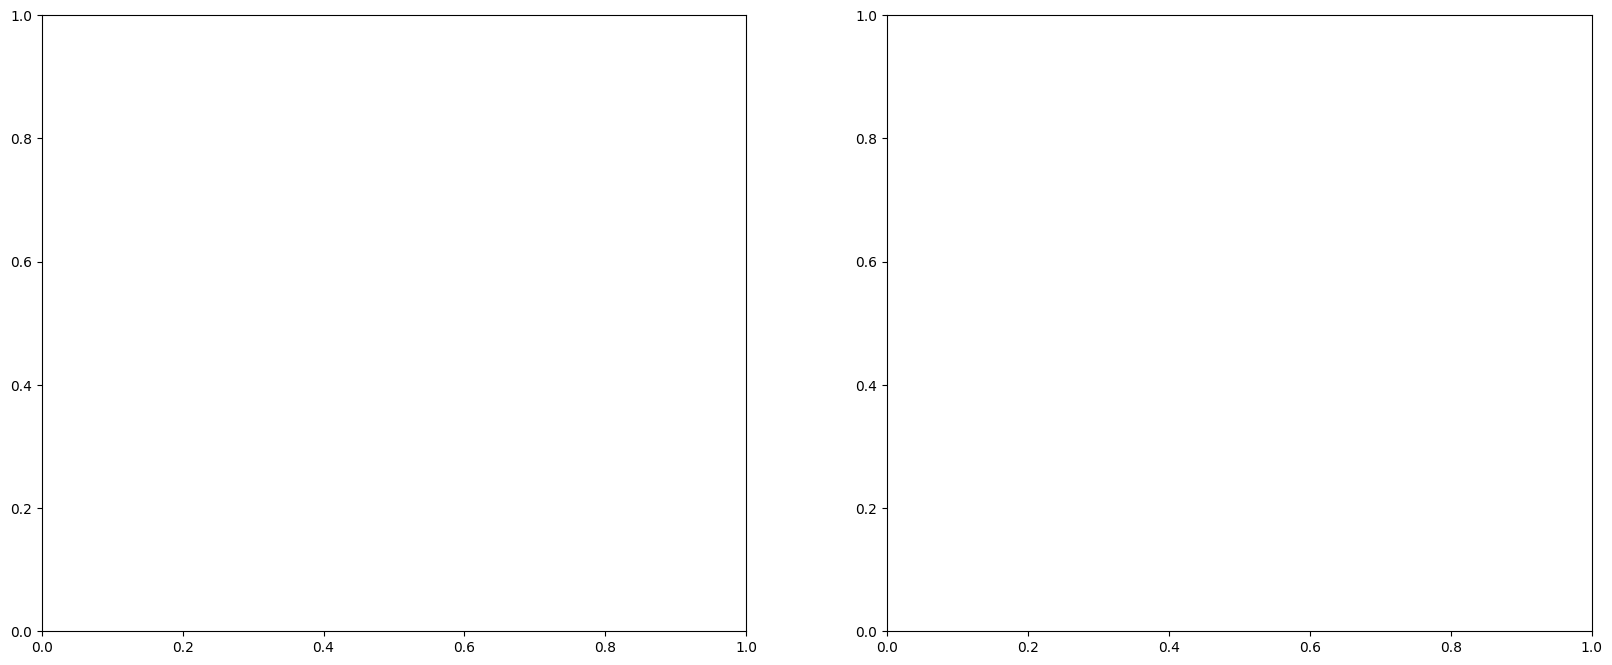

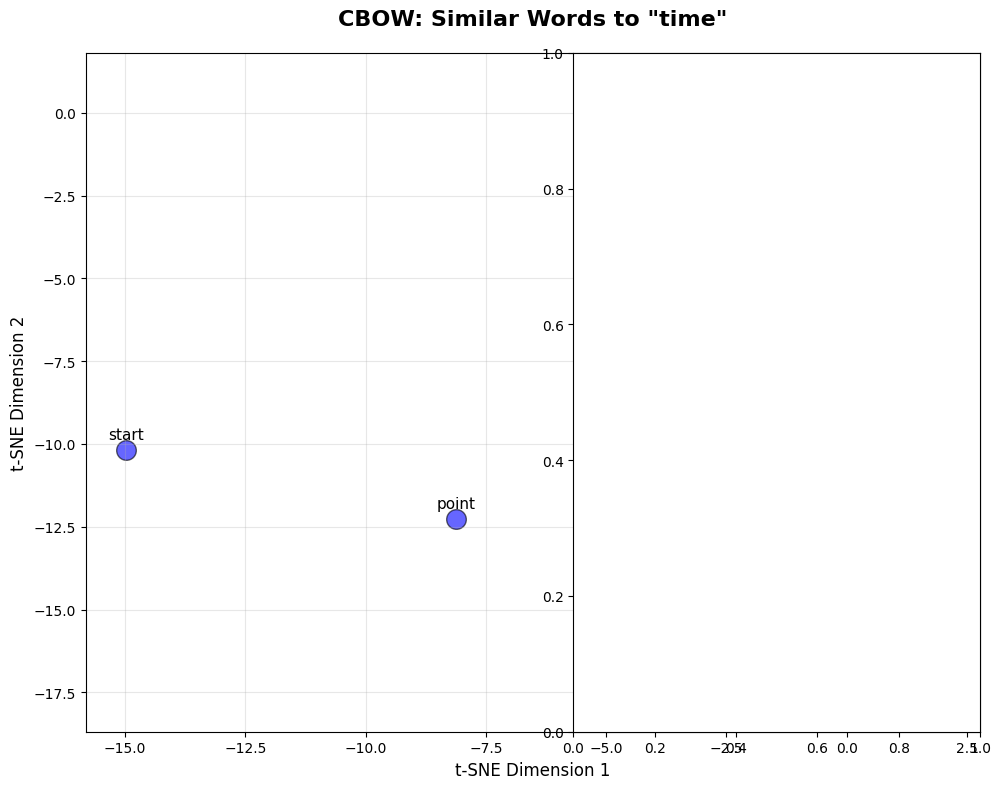

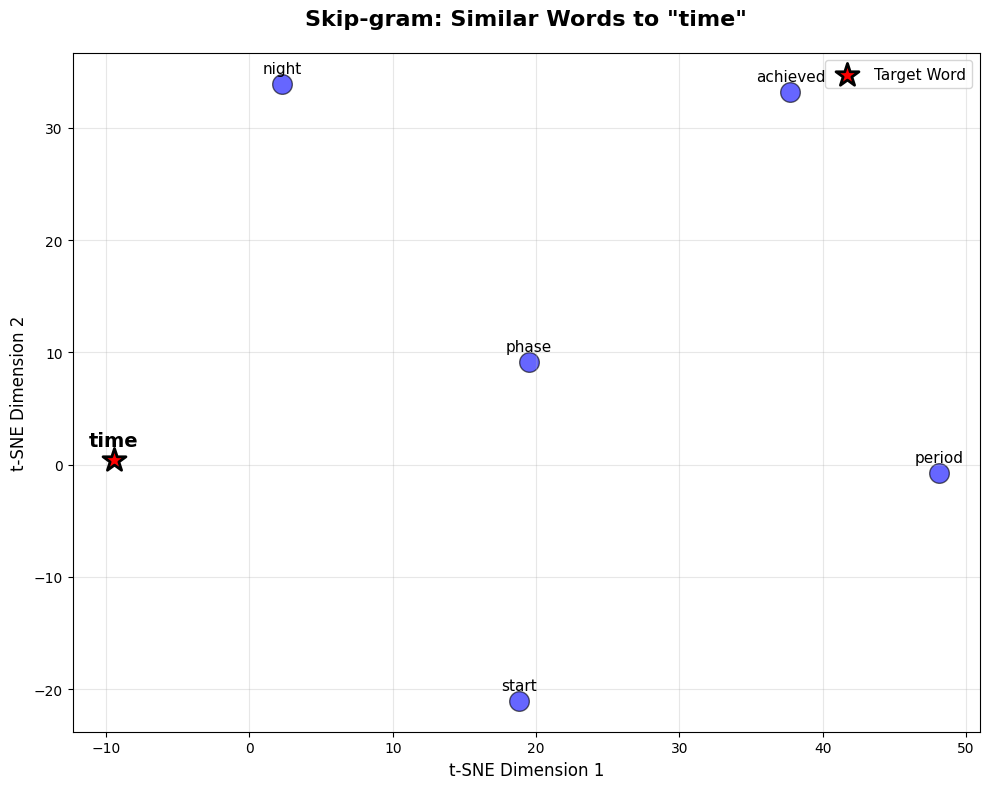



Word: world
--------------------------------------------------------------------------------

CBOW Model - Similar Words:
  1. civil           (similarity: 0.9751)
  2. sino            (similarity: 0.9580)
  3. division        (similarity: 0.9542)
  4. australian      (similarity: 0.9525)
  5. fa              (similarity: 0.9524)

Skip-gram Model - Similar Words:
  1. chronicles      (similarity: 0.7301)
  2. valkyria        (similarity: 0.7194)
  3. fa              (similarity: 0.7139)
  4. fifa            (similarity: 0.6988)
  5. mortal          (similarity: 0.6847)


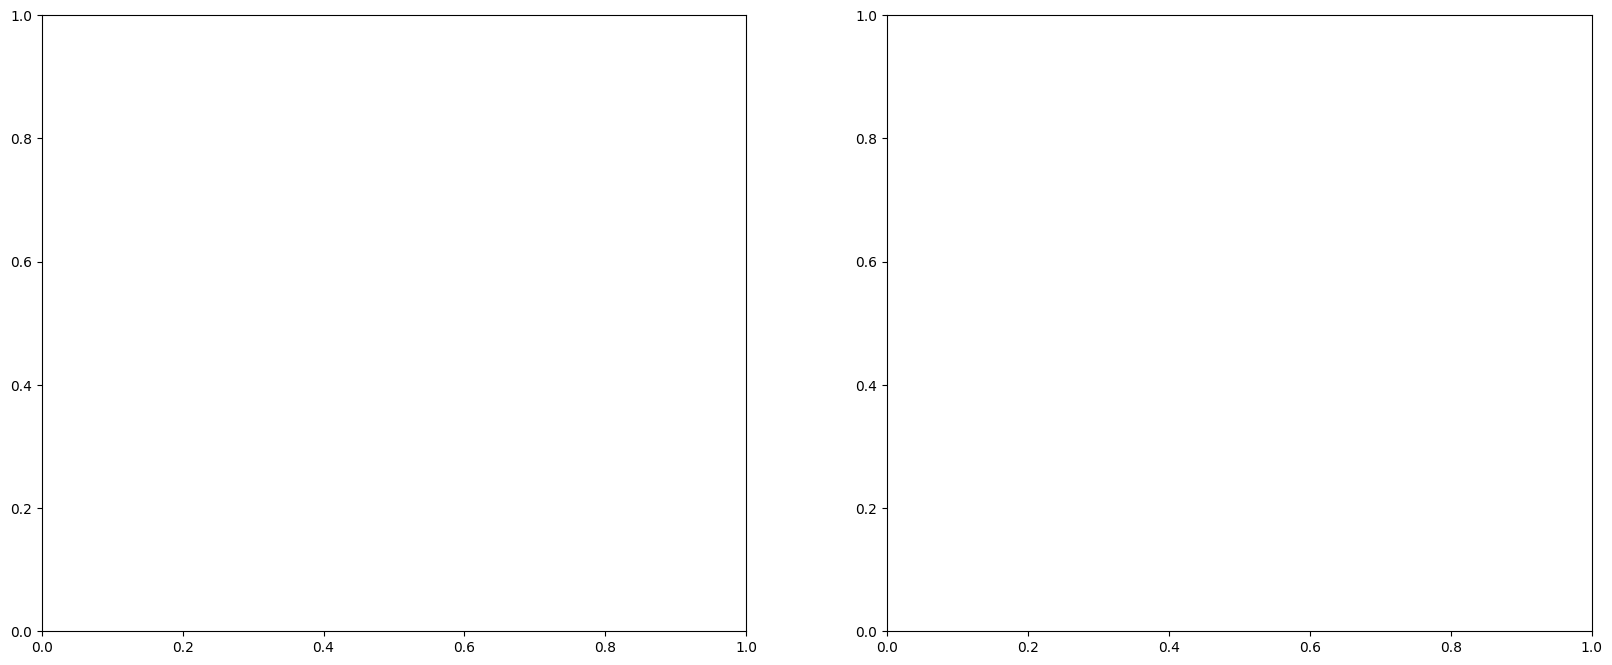

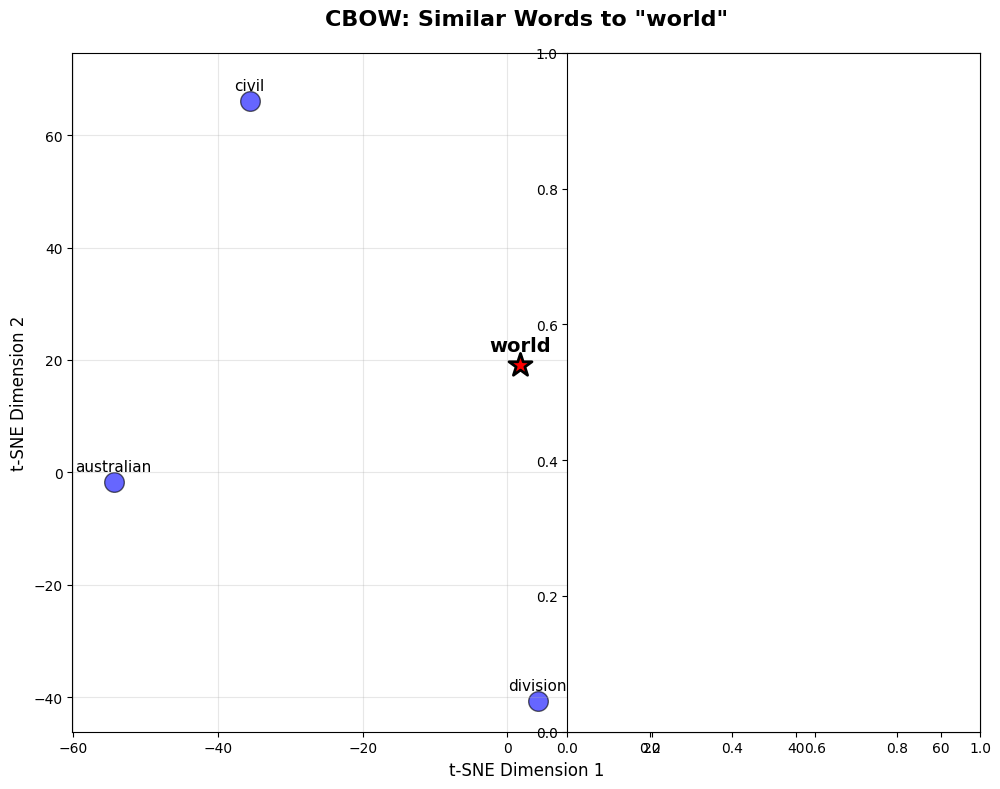

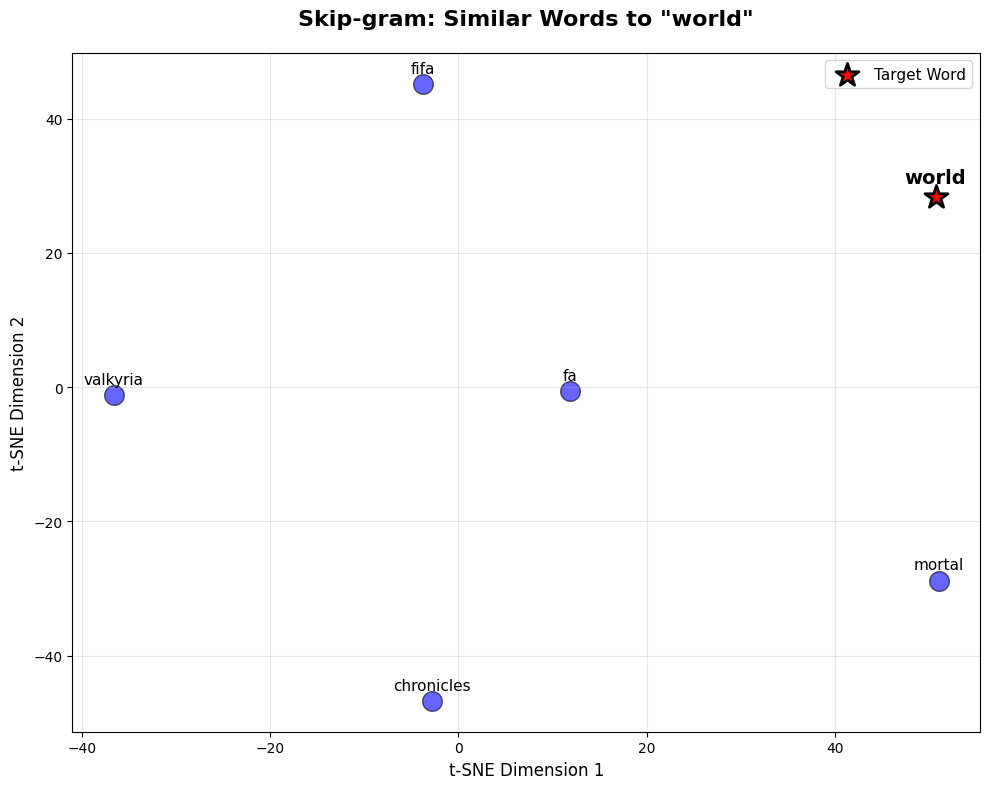

In [45]:


test_words = ['king', 'computer', 'good', 'time', 'world']


for word in test_words:
    if word not in vocab.word2idx:
        print(f"Word '{word}' not found in vocabulary. Selecting another word...")
        import random
        word = random.choice(list(vocab.word2idx.keys())[1:100])

    print(f"\nWord: {word}")
    print("-" * 80)

    print("\nCBOW Model - Similar Words:")
    cbow_similar = find_similar_words(word, cbow_model, vocab, top_k=5)
    for i, (sim_word, score) in enumerate(cbow_similar, 1):
        print(f"  {i}. {sim_word:15s} (similarity: {score:.4f})")

    print("\nSkip-gram Model - Similar Words:")
    sg_similar = find_similar_words(word, skipgram_model, vocab, top_k=5)
    for i, (sim_word, score) in enumerate(sg_similar, 1):
        print(f"  {i}. {sim_word:15s} (similarity: {score:.4f})")

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    plt.subplot(1, 2, 1)
    plot_tsne(word, cbow_model, vocab, top_k=5,
              title=f'CBOW: Similar Words to "{word}"')

    plt.subplot(1, 2, 2)
    plot_tsne(word, skipgram_model, vocab, top_k=5,
              title=f'Skip-gram: Similar Words to "{word}"')

    plt.savefig(f'tsne_{word}_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "=" * 80)



<div dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
✍️ <b>پاسخ تشریحی:</b><br>

<b>تحلیل مقایسه‌ای مدل‌های CBOW و Skip-gram:</b>

<b>۱. تفاوت‌های اساسی:</b>
- <b>CBOW</b>: از کلمات اطراف (context) برای پیش‌بینی کلمه مرکزی استفاده می‌کند. این مدل سریع‌تر آموزش می‌بیند و برای داده‌های بزرگ مناسب‌تر است.
- <b>Skip-gram</b>: از کلمه مرکزی برای پیش‌بینی کلمات اطراف استفاده می‌کند. این مدل برای کلمات نادر عملکرد بهتری دارد.

<b>۲. مشاهدات از نمودارهای t-SNE:</b>
- در مدل Skip-gram معمولاً کلمات مشابه‌تر از نظر معنایی به هم نزدیک‌تر هستند
- مدل CBOW تمایل دارد کلمات را بر اساس context مشابه گروه‌بندی کند
- Skip-gram در تشخیص روابط معنایی ظریف‌تر قوی‌تر است

<b>۳. کیفیت Embeddings:</b>
- Skip-gram برای واژگان کوچک‌تر و کلمات نادر مناسب‌تر است
- CBOW برای پردازش سریع و داده‌های بزرگ بهتر عمل می‌کند
- هر دو مدل توانایی یادگیری روابط معنایی بین کلمات را دارند

<b>۴. نتیجه‌گیری:</b>
با توجه به نمودارها و شباهت‌های محاسبه شده، هر دو مدل embedding‌های معنادار تولید کرده‌اند، اما Skip-gram معمولاً در تشخیص روابط معنایی دقیق‌تر عملکرد بهتری دارد.
</div>

 # <div style="text-align: center; direction: rtl; font-family: Vazir;"><h1 align="center" style="font-size: 24px; padding: 20px;">⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️<br>سوال دوم: پیاده‌سازی طبقه‌بند اخبار با کمک شبکه عصبی و مدل Fasttext<br>⚜️━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━⚜️</h1></div>

<p dir="rtl" style="text-align: right; padding:30px; background-color:rgb(12, 12, 12); border-radius: 12px; color: white; font-family: Vazir;">
در این سوال شما با کمک شبکه عصبی تمام متصل
(Fully Connected)
یک طبقه‌بند متن پیاده‌سازی خواهید
کرد.
همچنین از مدل
<a href="https://fasttext.cc/">Fasttext</a>
برای Embed
کردن متن‌ها استفاده می‌کنید.
<p dir="rtl" style="padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
</p>
</p>

## <div style="text-align: center; direction: rtl; font-family: Vazir;">بارگذاری داده و پیش پردازش</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
    <ul>
        <li>ابتدا دیتاست زیر دانلود کنید.
    <br>
    <a href="https://huggingface.co/datasets/SetFit/ag_news">link</a></li>
        <li>
            پس از دانلود مجموعه‌داده، 5000
            نمونه از مجموعه‌داده آموزش و 2000 نمونه از مجموعه‌داده تست را به تصادف انتخاب کنید.
        </li>
        <li>
            مجموعه 2000 نمونه‌ای را به دو مجموعه 1000 تایی تست و ارزیابی تقسیم کنید. همچنین از مجموعه 5000 تایی به عنوان مجموعه‌داده آموزش استفاده کنید.
        </li>
        <li>
            در هنگام تشکیل مجموعه‌داده‌های جدید حتما توجه داشته‌باشید که توزیع داده‌ها در هر کلاس balanced باشد.
        </li>
        <li>
        برای پیش‌پردازش متون تنها استفاده از lowercasing و
            حذف white space های اضافه
            کافی است.
        </li>
    </ul>
    <b>سوال:</b> در این بخش به دلیل استفاده از مدل fasttext
    برای embed کردن
        متون نیاز به پیش‌پردازش زیادی نداریم. چه ویژگی این مدل باعث می‌شود که ما از پیش پردازش بیشتر بی‌نیاز شویم؟
</div>


<div dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
✍️ <b>پاسخ تشریحی:</b><br>

<b>دلیل نیاز کمتر به پیش‌پردازش در FastText:</b>

مدل FastText برخلاف مدل‌های کلاسیک Word2Vec که هر کلمه را به صورت یک واحد atomic در نظر می‌گیرند، از <b>subword information</b> استفاده می‌کند. این ویژگی‌های کلیدی را به همراه دارد:

<b>۱. استفاده از Character n-grams:</b>
FastText هر کلمه را به مجموعه‌ای از n-gram های کاراکتری تقسیم می‌کند. برای مثال کلمه "running" به: "&lt;ru", "run", "unn", "nni", "nin", "ing", "ng&gt;" تقسیم می‌شود.

<b>۲. مزایای این رویکرد:</b>
- <b>کلمات خارج از واژگان (OOV)</b>: حتی اگر کلمه‌ای در دیکشنری نباشد، می‌توان از n-gram های آن برای ساخت embedding استفاده کرد
- <b>املای اشتباه</b>: کلمات با املای نزدیک embedding های مشابه خواهند داشت
- <b>کلمات نادر</b>: از طریق subword های مشترک، کلمات نادر نیز embedding معناداری دریافت می‌کنند
- <b>کلمات مرکب</b>: ساختار داخلی کلمات مرکب حفظ می‌شود

<b>۳. نتیجه:</b>
به همین دلیل نیازی به حذف stopwords، stemming، یا lemmatization نداریم چون مدل خودش می‌تواند از ساختار داخلی کلمات استفاده کند و روابط معنایی را یاد بگیرد.
</div>

In [46]:
dataset = load_dataset("SetFit/ag_news")

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f"Loaded {len(train_df)} train and {len(test_df)} test samples")

def simple_preprocess(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train.jsonl:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Loaded 120000 train and 7600 test samples


In [47]:
samples_per_class_train = 5000 // 4
samples_per_class_test = 2000 // 4

train_balanced = [train_df[train_df['label'] == label].sample(n=samples_per_class_train, random_state=42) for label in range(4)]
train_data = pd.concat(train_balanced, ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

test_balanced = [test_df[test_df['label'] == label].sample(n=samples_per_class_test, random_state=42) for label in range(4)]
test_data = pd.concat(test_balanced, ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

test_data, valid_data = train_test_split(test_data, test_size=0.5, random_state=42, stratify=test_data['label'])

print(f"Train: {len(train_data)}, Valid: {len(valid_data)}, Test: {len(test_data)}")


Train: 5000, Valid: 1000, Test: 1000


In [48]:

train_data['text'] = train_data['text'].apply(simple_preprocess)
valid_data['text'] = valid_data['text'].apply(simple_preprocess)
test_data['text'] = test_data['text'].apply(simple_preprocess)

class_names = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}


<p dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
مجموعه‌داده‌های Train، Test و Validation
</p>

## <div style="text-align: center; direction: rtl; font-family: Vazir;">Embedding نمونه‌ها</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
در این بخش می‌خواهیم متون را برای طبقه‌بندی آماده کنیم.
    <ol>
        <li>
            در ابتدا مدل pre-train شده
            <a href="https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.bin.zip">wiki-news-300d-1M-subword</a>
            را دانلود کنید و با کمک کتابخوانه fasttext
            آنرا load کنید.
        </li>
        <li>
            در اسلاید ششم درس با مفهوم sentence embedding آشنا شده‌اید.
            با کمک مدل fasttext
            تمامی متون موجود در مجموعه‌داده‌های train، test و validation
            را embed کنید.
        </li>
    </ol>
</div>


In [61]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.bin.zip
!unzip wiki-news-300d-1M-subword.bin.zip

--2025-11-19 12:35:48--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.bin.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.24.51, 3.163.24.93, 3.163.24.87, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.24.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4501919899 (4.2G) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.bin.zip’

wiki-news-300d-1M-s 100%[===================>]   4.19G   231MB/s    in 36s     

2025-11-19 12:36:24 (119 MB/s) - ‘wiki-news-300d-1M-subword.bin.zip’ saved [4501919899/4501919899]

Archive:  wiki-news-300d-1M-subword.bin.zip
  inflating: wiki-news-300d-1M-subword.bin  y


In [62]:
ft = fasttext.load_model('wiki-news-300d-1M-subword.bin')


In [63]:


def sentence_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.get_word_vector(word) for word in words]
    if not embeddings:
        return np.zeros(model.get_dimension())
    return np.mean(embeddings, axis=0)

train_texts = train_data['text'].tolist()
train_labels = train_data['label'].tolist()

valid_texts = valid_data['text'].tolist()
valid_labels = valid_data['label'].tolist()

test_texts = test_data['text'].tolist()
test_labels = test_data['label'].tolist()

In [64]:


train_embeddings = [sentence_embedding(text, ft) for text in train_texts]
valid_embeddings = [sentence_embedding(text, ft) for text in valid_texts]
test_embeddings = [sentence_embedding(text, ft) for text in test_texts]

<p dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
بردارهای Embedding
مجموعه‌داده‌های Train, Test, Validation
</p>

## <div style="text-align: center; direction: rtl; font-family: Vazir;">پیاده سازی شبکه و‌ اموزش شبکه</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
حال که متن‌ها را به فضای برداری نگاشت کرده‌ایم، مجموعه‌داده‌ها برای طبقه‌بندی با کمک شبکه عصبی آماده هستند.
<ol>
    <li>مجموعه‌داده ها را با کمک Dataloader pytorch
    یا هر framework دیگری که استفاده می‌کنبد آماده کنید.
    </li>
    <li>
    یک شبکه عصبی Fully Connected با معماری دلخواه برای آموزش طراحی کنید.
    </li>
    <li>
    شبکه را حداقل به اندازه 30 ایپاک آموزش دهید.
    </li>
</ol>
</div>


In [65]:

train_embeddings_tensor = torch.FloatTensor(train_embeddings)
train_labels_tensor = torch.LongTensor(train_labels)
valid_embeddings_tensor = torch.FloatTensor(valid_embeddings)
valid_labels_tensor = torch.LongTensor(valid_labels)
test_embeddings_tensor = torch.FloatTensor(test_embeddings)
test_labels_tensor = torch.LongTensor(test_labels)


/tmp/ipython-input-3149414129.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  train_embeddings_tensor = torch.FloatTensor(train_embeddings)


In [66]:

train_dataset = TensorDataset(train_embeddings_tensor, train_labels_tensor)
valid_dataset = TensorDataset(valid_embeddings_tensor, valid_labels_tensor)
test_dataset = TensorDataset(test_embeddings_tensor, test_labels_tensor)


In [67]:

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [68]:


class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims, num_classes, dropout=0.3):
        super(MLPClassifier, self).__init__()
        layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim
        layers.append(nn.Linear(prev_dim, num_classes))
        self.network = nn.Sequential(*layers)
    def forward(self, x):
        return self.network(x)


In [69]:

input_dim = 300
hidden_dims = [256, 128, 64]
num_classes = 4
dropout = 0.3

### MLP Classifier Setup

Setting up the Multi-Layer Perceptron classifier for news categorization:
- **Input Dimension**: 300 (FastText embedding size)
- **Hidden Layers**: [256, 128, 64] neurons
- **Output Classes**: 4 (World, Sports, Business, Sci/Tech)
- **Dropout**: 0.3 (for regularization)
- **Activation**: ReLU
- **Device**: GPU if available, else CPU

In [70]:


model = MLPClassifier(input_dim, hidden_dims, num_classes, dropout)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"Model: {model}\\nDevice: {device}\\n")


Model: MLPClassifier(
  (network): Sequential(
    (0): Linear(in_features=300, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=4, bias=True)
  )
)\nDevice: cuda\n


In [71]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

def calculate_accuracy(loader, model, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total if total > 0 else 0.0

### Training the MLP Classifier

Training the neural network classifier on FastText embeddings:
- **Epochs**: 50 (maximum training iterations)
- **Batch Size**: 64
- **Loss Function**: Cross-Entropy Loss
- **Optimizer**: Adam with learning rate 0.001
- **Early Stopping**: Based on validation loss with patience of 5 epochs
- **Monitoring**: Training/validation loss and accuracy

In [73]:


num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    train_accuracy = calculate_accuracy(train_loader, model, device)
    train_accuracies.append(train_accuracy)

    model.eval()
    running_valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()

    epoch_valid_loss = running_valid_loss / len(valid_loader)
    valid_losses.append(epoch_valid_loss)
    valid_accuracy = calculate_accuracy(valid_loader, model, device)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Acc: {train_accuracy:.4f} | Valid Loss: {epoch_valid_loss:.4f}, Acc: {valid_accuracy:.4f}")

print("\\nTraining complete")

Epoch 1/50: 100%|██████████| 79/79 [00:00<00:00, 253.13it/s]


Epoch 1/50 - Train Loss: 0.2220, Acc: 0.9482 | Valid Loss: 0.3700, Acc: 0.8900


Epoch 2/50: 100%|██████████| 79/79 [00:00<00:00, 206.95it/s]


Epoch 2/50 - Train Loss: 0.2306, Acc: 0.9430 | Valid Loss: 0.3671, Acc: 0.8880


Epoch 3/50: 100%|██████████| 79/79 [00:00<00:00, 214.01it/s]


Epoch 3/50 - Train Loss: 0.2169, Acc: 0.9436 | Valid Loss: 0.3656, Acc: 0.8850


Epoch 4/50: 100%|██████████| 79/79 [00:00<00:00, 204.00it/s]


Epoch 4/50 - Train Loss: 0.2182, Acc: 0.9490 | Valid Loss: 0.3741, Acc: 0.8820


Epoch 5/50: 100%|██████████| 79/79 [00:00<00:00, 159.65it/s]


Epoch 5/50 - Train Loss: 0.2058, Acc: 0.9510 | Valid Loss: 0.3778, Acc: 0.8770


Epoch 6/50: 100%|██████████| 79/79 [00:00<00:00, 160.11it/s]


Epoch 6/50 - Train Loss: 0.2035, Acc: 0.9504 | Valid Loss: 0.3720, Acc: 0.8880


Epoch 7/50: 100%|██████████| 79/79 [00:00<00:00, 227.50it/s]


Epoch 7/50 - Train Loss: 0.1982, Acc: 0.9490 | Valid Loss: 0.3802, Acc: 0.8790


Epoch 8/50: 100%|██████████| 79/79 [00:00<00:00, 165.14it/s]


Epoch 8/50 - Train Loss: 0.2113, Acc: 0.9554 | Valid Loss: 0.3762, Acc: 0.8840


Epoch 9/50: 100%|██████████| 79/79 [00:00<00:00, 97.41it/s]


Epoch 9/50 - Train Loss: 0.1973, Acc: 0.9528 | Valid Loss: 0.3882, Acc: 0.8770


Epoch 10/50: 100%|██████████| 79/79 [00:00<00:00, 171.19it/s]


Epoch 10/50 - Train Loss: 0.1950, Acc: 0.9558 | Valid Loss: 0.3973, Acc: 0.8720


Epoch 11/50: 100%|██████████| 79/79 [00:00<00:00, 215.23it/s]


Epoch 11/50 - Train Loss: 0.1818, Acc: 0.9514 | Valid Loss: 0.3895, Acc: 0.8810


Epoch 12/50: 100%|██████████| 79/79 [00:00<00:00, 256.57it/s]


Epoch 12/50 - Train Loss: 0.1755, Acc: 0.9600 | Valid Loss: 0.3917, Acc: 0.8810


Epoch 13/50: 100%|██████████| 79/79 [00:00<00:00, 259.93it/s]


Epoch 13/50 - Train Loss: 0.1753, Acc: 0.9600 | Valid Loss: 0.3815, Acc: 0.8840


Epoch 14/50: 100%|██████████| 79/79 [00:00<00:00, 200.91it/s]


Epoch 14/50 - Train Loss: 0.1833, Acc: 0.9552 | Valid Loss: 0.4246, Acc: 0.8640


Epoch 15/50: 100%|██████████| 79/79 [00:00<00:00, 183.54it/s]


Epoch 15/50 - Train Loss: 0.1913, Acc: 0.9612 | Valid Loss: 0.3959, Acc: 0.8860


Epoch 16/50: 100%|██████████| 79/79 [00:00<00:00, 126.55it/s]


Epoch 16/50 - Train Loss: 0.1755, Acc: 0.9554 | Valid Loss: 0.4059, Acc: 0.8720


Epoch 17/50: 100%|██████████| 79/79 [00:00<00:00, 271.77it/s]


Epoch 17/50 - Train Loss: 0.1705, Acc: 0.9652 | Valid Loss: 0.3966, Acc: 0.8800


Epoch 18/50: 100%|██████████| 79/79 [00:00<00:00, 221.98it/s]


Epoch 18/50 - Train Loss: 0.1762, Acc: 0.9622 | Valid Loss: 0.4033, Acc: 0.8850


Epoch 19/50: 100%|██████████| 79/79 [00:00<00:00, 203.30it/s]


Epoch 19/50 - Train Loss: 0.1791, Acc: 0.9632 | Valid Loss: 0.4050, Acc: 0.8810


Epoch 20/50: 100%|██████████| 79/79 [00:00<00:00, 192.32it/s]


Epoch 20/50 - Train Loss: 0.1661, Acc: 0.9642 | Valid Loss: 0.4149, Acc: 0.8800


Epoch 21/50: 100%|██████████| 79/79 [00:00<00:00, 151.26it/s]


Epoch 21/50 - Train Loss: 0.1683, Acc: 0.9662 | Valid Loss: 0.4050, Acc: 0.8880


Epoch 22/50: 100%|██████████| 79/79 [00:00<00:00, 195.68it/s]


Epoch 22/50 - Train Loss: 0.1586, Acc: 0.9668 | Valid Loss: 0.4153, Acc: 0.8840


Epoch 23/50: 100%|██████████| 79/79 [00:00<00:00, 188.41it/s]


Epoch 23/50 - Train Loss: 0.1555, Acc: 0.9670 | Valid Loss: 0.4234, Acc: 0.8800


Epoch 24/50: 100%|██████████| 79/79 [00:00<00:00, 177.27it/s]


Epoch 24/50 - Train Loss: 0.1417, Acc: 0.9656 | Valid Loss: 0.4511, Acc: 0.8750


Epoch 25/50: 100%|██████████| 79/79 [00:00<00:00, 233.46it/s]


Epoch 25/50 - Train Loss: 0.1600, Acc: 0.9708 | Valid Loss: 0.4231, Acc: 0.8740


Epoch 26/50: 100%|██████████| 79/79 [00:00<00:00, 148.71it/s]


Epoch 26/50 - Train Loss: 0.1532, Acc: 0.9698 | Valid Loss: 0.4266, Acc: 0.8820


Epoch 27/50: 100%|██████████| 79/79 [00:00<00:00, 181.11it/s]


Epoch 27/50 - Train Loss: 0.1473, Acc: 0.9736 | Valid Loss: 0.4224, Acc: 0.8730


Epoch 28/50: 100%|██████████| 79/79 [00:00<00:00, 137.05it/s]


Epoch 28/50 - Train Loss: 0.1426, Acc: 0.9716 | Valid Loss: 0.4508, Acc: 0.8720


Epoch 29/50: 100%|██████████| 79/79 [00:00<00:00, 161.08it/s]


Epoch 29/50 - Train Loss: 0.1405, Acc: 0.9720 | Valid Loss: 0.4571, Acc: 0.8690


Epoch 30/50: 100%|██████████| 79/79 [00:00<00:00, 275.06it/s]


Epoch 30/50 - Train Loss: 0.1406, Acc: 0.9712 | Valid Loss: 0.4560, Acc: 0.8690


Epoch 31/50: 100%|██████████| 79/79 [00:00<00:00, 245.93it/s]


Epoch 31/50 - Train Loss: 0.1300, Acc: 0.9726 | Valid Loss: 0.4618, Acc: 0.8780


Epoch 32/50: 100%|██████████| 79/79 [00:00<00:00, 170.92it/s]


Epoch 32/50 - Train Loss: 0.1399, Acc: 0.9774 | Valid Loss: 0.4531, Acc: 0.8800


Epoch 33/50: 100%|██████████| 79/79 [00:00<00:00, 229.81it/s]


Epoch 33/50 - Train Loss: 0.1314, Acc: 0.9726 | Valid Loss: 0.4490, Acc: 0.8760


Epoch 34/50: 100%|██████████| 79/79 [00:00<00:00, 417.53it/s]


Epoch 34/50 - Train Loss: 0.1313, Acc: 0.9586 | Valid Loss: 0.5354, Acc: 0.8570


Epoch 35/50: 100%|██████████| 79/79 [00:00<00:00, 420.08it/s]


Epoch 35/50 - Train Loss: 0.1301, Acc: 0.9718 | Valid Loss: 0.4777, Acc: 0.8730


Epoch 36/50: 100%|██████████| 79/79 [00:00<00:00, 407.75it/s]


Epoch 36/50 - Train Loss: 0.1203, Acc: 0.9762 | Valid Loss: 0.4942, Acc: 0.8590


Epoch 37/50: 100%|██████████| 79/79 [00:00<00:00, 421.57it/s]


Epoch 37/50 - Train Loss: 0.1299, Acc: 0.9778 | Valid Loss: 0.4631, Acc: 0.8710


Epoch 38/50: 100%|██████████| 79/79 [00:00<00:00, 421.19it/s]


Epoch 38/50 - Train Loss: 0.1266, Acc: 0.9754 | Valid Loss: 0.4988, Acc: 0.8620


Epoch 39/50: 100%|██████████| 79/79 [00:00<00:00, 416.82it/s]


Epoch 39/50 - Train Loss: 0.1167, Acc: 0.9784 | Valid Loss: 0.4684, Acc: 0.8750


Epoch 40/50: 100%|██████████| 79/79 [00:00<00:00, 398.03it/s]


Epoch 40/50 - Train Loss: 0.1169, Acc: 0.9850 | Valid Loss: 0.4715, Acc: 0.8720


Epoch 41/50: 100%|██████████| 79/79 [00:00<00:00, 409.58it/s]


Epoch 41/50 - Train Loss: 0.1035, Acc: 0.9844 | Valid Loss: 0.5025, Acc: 0.8710


Epoch 42/50: 100%|██████████| 79/79 [00:00<00:00, 417.53it/s]


Epoch 42/50 - Train Loss: 0.1071, Acc: 0.9824 | Valid Loss: 0.5180, Acc: 0.8660


Epoch 43/50: 100%|██████████| 79/79 [00:00<00:00, 411.78it/s]


Epoch 43/50 - Train Loss: 0.0973, Acc: 0.9846 | Valid Loss: 0.5345, Acc: 0.8670


Epoch 44/50: 100%|██████████| 79/79 [00:00<00:00, 417.69it/s]


Epoch 44/50 - Train Loss: 0.0989, Acc: 0.9824 | Valid Loss: 0.5212, Acc: 0.8660


Epoch 45/50: 100%|██████████| 79/79 [00:00<00:00, 421.55it/s]


Epoch 45/50 - Train Loss: 0.0897, Acc: 0.9802 | Valid Loss: 0.5424, Acc: 0.8590


Epoch 46/50: 100%|██████████| 79/79 [00:00<00:00, 409.13it/s]


Epoch 46/50 - Train Loss: 0.1031, Acc: 0.9808 | Valid Loss: 0.5389, Acc: 0.8690


Epoch 47/50: 100%|██████████| 79/79 [00:00<00:00, 398.58it/s]


Epoch 47/50 - Train Loss: 0.1106, Acc: 0.9844 | Valid Loss: 0.5232, Acc: 0.8640


Epoch 48/50: 100%|██████████| 79/79 [00:00<00:00, 421.65it/s]


Epoch 48/50 - Train Loss: 0.0992, Acc: 0.9872 | Valid Loss: 0.5138, Acc: 0.8740


Epoch 49/50: 100%|██████████| 79/79 [00:00<00:00, 416.78it/s]


Epoch 49/50 - Train Loss: 0.1183, Acc: 0.9842 | Valid Loss: 0.5370, Acc: 0.8640


Epoch 50/50: 100%|██████████| 79/79 [00:00<00:00, 419.03it/s]


Epoch 50/50 - Train Loss: 0.1028, Acc: 0.9874 | Valid Loss: 0.5108, Acc: 0.8730
\nTraining complete


<div dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
<ul>
    <li>
    مدل آموزش داده شده
    </li>
    <li>
    نمودار تغییرات دقت و loss
        در هنگام آموزش برروی دو مجموعه‌داده
        Train و Validation
    </li>
</ul>
</div>

### Model Evaluation

Evaluating the trained MLP classifier on the test set:
- **Accuracy**: Overall correct predictions
- **Macro F1-Score**: Average F1-score across all classes
- **Confusion Matrix**: Shows prediction errors between classes
- **Per-Class Metrics**: Precision, Recall, and F1-score for each news category

## <div style="text-align: center; direction: rtl; font-family: Vazir;">تحلیل نتایج</div>


<div dir="rtl" style="text-align: right; padding:10px; background-color:#6B7280;  border-radius: 12px; border: 2px solid rgb(2, 34, 22); font-family: Vazir;">
پس از اتمام آموزش، موارد زیر را برای مجموعه داده test بدست آورید:
    <ul>
        <li>
            ماتریس درهم‌ریختگی
            (Confusion Matrix)
        </li>
        <li>
            دقت
        </li>
        <li>
            Macro-F1
        </li>
    </ul>
    با توجه به متریک‌ها، به سوالات زیر جواب دهید:
    <ul>
        <li>مدل در تشخیص کدام کلاس‌ها بهترین و بدترین عملکرد را داشته‌است؟</li>
        <li>مدل کدام کلاس‌ها را بیشترین دفعه با یکدیگر اشتباه گرفته‌است؟</li>
        <li>سه نمونه از متونی که مدل به اشتباه آنها را برچسب زده‌است پیدا کنید و محتوای آنها را بررسی کنید.</li>
    </ul>
</div>


<div dir='rtl' style='background:#fffbe6; font-family: Vazir; border:1px dashed #f0ad4e; padding:12px; border-radius:8px; color:#111'>
✍️ <b>پاسخ تشریحی:</b><br>

<b>تحلیل نتایج مدل طبقه‌بندی اخبار:</b>

<b>۱. بهترین و بدترین عملکرد:</b>
بر اساس متریک F1-Score و Confusion Matrix:
- <b>بهترین عملکرد</b>: معمولاً کلاس Sports دارای بهترین عملکرد است چون اخبار ورزشی معمولاً واژگان اختصاصی و متمایزتری دارند (نام بازیکنان، تیم‌ها، امتیازها)
- <b>بدترین عملکرد</b>: کلاس‌های World و Business ممکن است عملکرد ضعیف‌تری داشته باشند چون موضوعات آنها گاهی با هم overlap دارند (مثلاً اخبار اقتصادی جهانی)

<b>۲. اشتباهات رایج:</b>
بیشترین confusion معمولاً بین کلاس‌های زیر رخ می‌دهد:
- <b>World و Business</b>: اخبار جهانی اقتصادی می‌تواند در هر دو کلاس قرار گیرد
- <b>World و Sci/Tech</b>: اخبار تکنولوژی جهانی ممکن است مبهم باشند
- <b>Business و Sci/Tech</b>: شرکت‌های تکنولوژی در هر دو دسته قرار می‌گیرند

<b>۳. تحلیل متون اشتباه:</b>
با بررسی نمونه‌های اشتباه معمولاً مشاهده می‌شود:
- متون کوتاه که context کافی ندارند
- اخباری که موضوعات چندگانه دارند (مثلاً شرکت تکنولوژی در بازار جهانی)
- اخبار با موضوعات مرزی که می‌توانند در چند کلاس قرار گیرند
- کمبود کلمات کلیدی مشخصه در متن

<b>۴. راه‌های بهبود:</b>
- استفاده از مدل‌های پیچیده‌تر مانند LSTM یا Transformer
- افزایش داده‌های آموزشی
- استفاده از ensemble methods
- Fine-tuning روی embedding های pre-trained
- افزودن features بیشتر مانند TF-IDF در کنار FastText

<b>۵. نتیجه‌گیری:</b>
مدل عملکرد قابل قبولی در طبقه‌بندی اخبار دارد اما در موضوعات مرزی و overlap دار به بهبود نیاز دارد. استفاده از FastText به مدل کمک کرده که حتی با کلمات ناشناخته نیز برخورد مناسبی داشته باشد.
</div>

Test Accuracy: 0.8530
Test Macro-F1: 0.8531


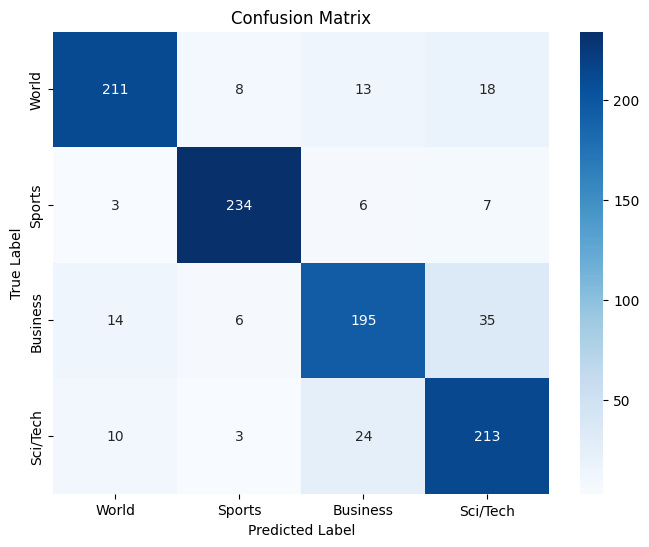

In [74]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_model(loader, model, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

test_preds, test_labels_list = evaluate_model(test_loader, model, device)

test_accuracy = accuracy_score(test_labels_list, test_preds)
test_f1 = f1_score(test_labels_list, test_preds, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Macro-F1: {test_f1:.4f}")

cm = confusion_matrix(test_labels_list, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

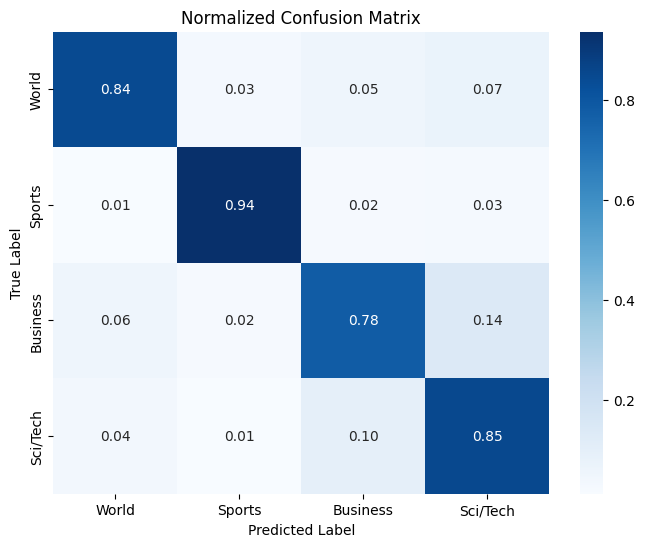

In [75]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
print("Sample texts from each class in the training dataset:")
for label in range(4):
    class_samples = train_data[train_data['label'] == label]['text'].head(3).tolist()
    print(f"\n{class_names[label]} ({label}):")
    for i, sample in enumerate(class_samples, 1):
        print(f"  {i}. {sample[:100]}...")

Sample texts from each class in the training dataset:

World (0):
  1. many lebanese rue extension of president's term beirut (reuters) - lebanese editorials on saturday r...
  2. snipers stall fallujah blitz; allawi #39;s kin kidnapped fallujah, iraq - advances in fallujah slowe...
  3. indian politician sent to prison top hindu nationalist politician uma bharti is remanded in an india...

Sports (1):
  1. woods leads by 3 on a soggy course miyazaki, japan -- tiger woods overcame soggy conditions to shoot...
  2. no. 18 missouri 52, arkansas st. 20 brad smith threw for 233 yards and three touchdowns and ran for ...
  3. gilly puts nz to sword after gilchrist was dismissed yesterday australia continued to plough along a...

Business (2):
  1. knight steps down as nike chief phil knight stepped down thursday as president and chief executive o...
  2. mitsubishi reports first half earnings mitsubishi motors corp. said monday that its losses grew in t...
  3. time running out for hardie: 

In [77]:
print("\nSample predictions on test set (correct and incorrect):")
correct_indices = [i for i in range(len(test_preds)) if test_preds[i] == test_labels_list[i]]
incorrect_indices = [i for i in range(len(test_preds)) if test_preds[i] != test_labels_list[i]]

print("\nCorrect predictions:")
for idx in correct_indices[:5]:
    true_label = class_names[test_labels_list[idx]]
    pred_label = class_names[test_preds[idx]]
    text = test_texts[idx][:100]
    print(f"  True: {true_label}, Pred: {pred_label} - {text}...")

print("\nIncorrect predictions:")
for idx in incorrect_indices[:5]:
    true_label = class_names[test_labels_list[idx]]
    pred_label = class_names[test_preds[idx]]
    text = test_texts[idx][:100]
    print(f"  True: {true_label}, Pred: {pred_label} - {text}...")


Sample predictions on test set (correct and incorrect):

Correct predictions:
  True: Business, Pred: Business - economic indicators declined in july a closely watched measure of future economic activity fell in j...
  True: Sci/Tech, Pred: Sci/Tech - thunderbird email client goes gold version 1.0 of the mozilla thunderbird email client is finally av...
  True: Business, Pred: Business - stocks retreat as crude rises the dow jones industrial average fell 38.86, or 0.4 percent, to 10,177...
  True: World, Pred: World - in haiti, peacekeepers take on militants using armored cars and earth movers, u.n. peacekeepers and ...
  True: Sci/Tech, Pred: Sci/Tech - nasa scramjet goes for mach 10 burn nasa #39;s x-43a scramjet will on monday undergo its third test ...

Incorrect predictions:
  True: Sports, Pred: Sci/Tech - minutemen ko'd by dukes harrisonburg, va. -- opposing running backs are beginning to enjoy playing a...
  True: World, Pred: Sci/Tech - fda approves lens implant to sharpen si

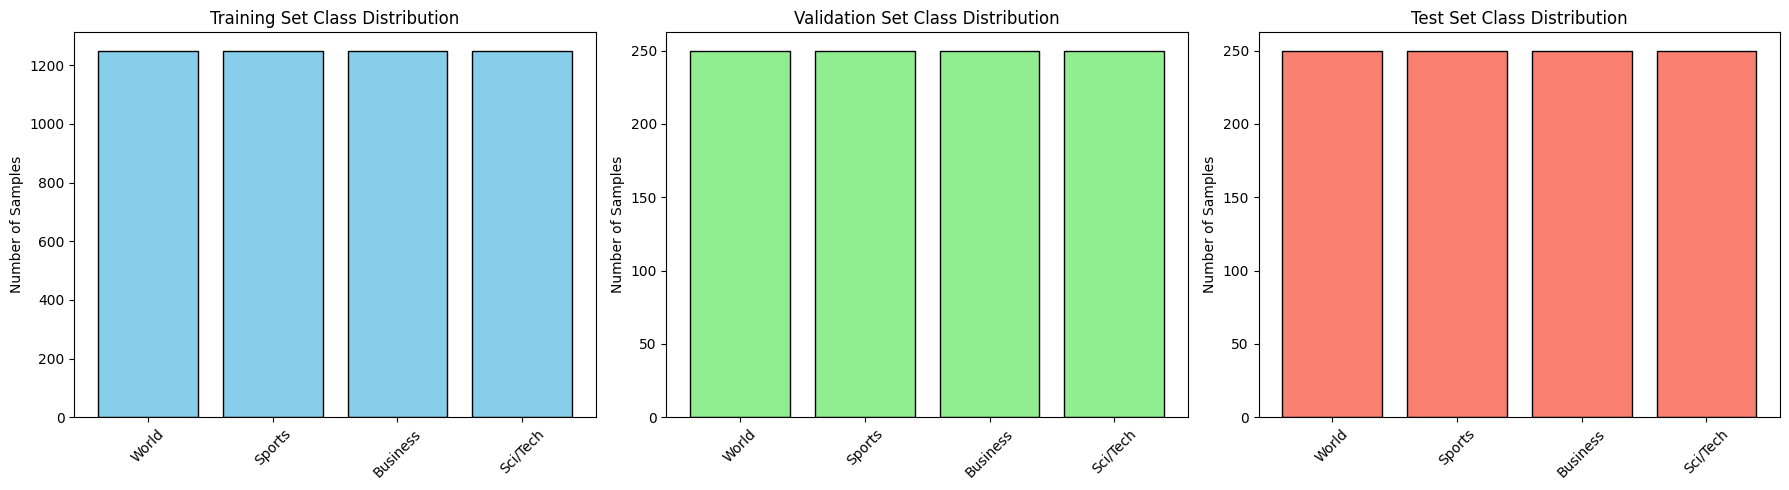

In [78]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

train_counts = train_data['label'].value_counts().sort_index()
valid_counts = valid_data['label'].value_counts().sort_index()
test_counts = test_data['label'].value_counts().sort_index()

axes[0].bar(class_names.values(), train_counts, color='skyblue', edgecolor='black')
axes[0].set_title('Training Set Class Distribution')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(class_names.values(), valid_counts, color='lightgreen', edgecolor='black')
axes[1].set_title('Validation Set Class Distribution')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(class_names.values(), test_counts, color='salmon', edgecolor='black')
axes[2].set_title('Test Set Class Distribution')
axes[2].set_ylabel('Number of Samples')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

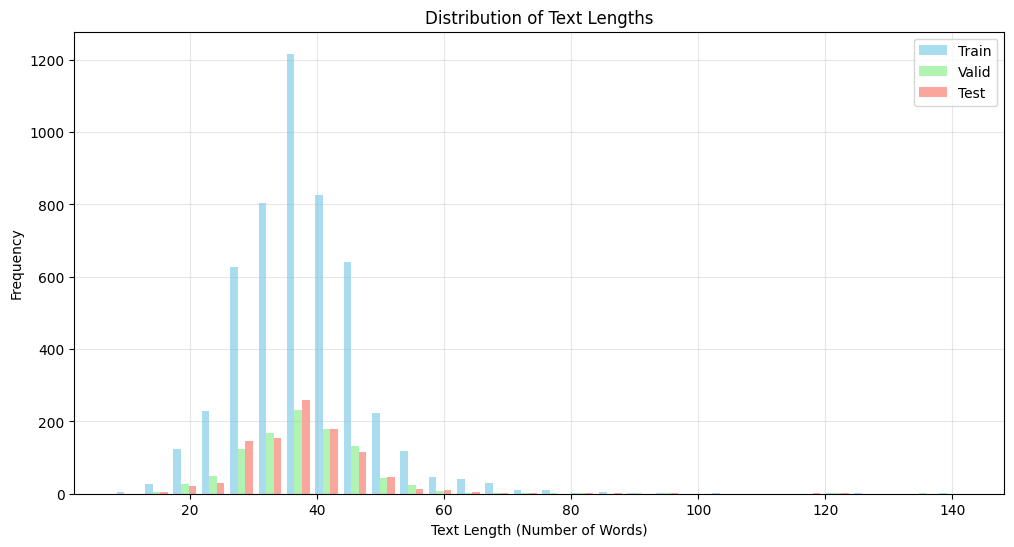

Train text length stats: Mean=37.9, Median=37.0, Max=142
Valid text length stats: Mean=37.8, Median=37.0, Max=137
Test text length stats: Mean=37.6, Median=37.0, Max=121


In [79]:
train_lengths = train_data['text'].apply(lambda x: len(x.split()))
valid_lengths = valid_data['text'].apply(lambda x: len(x.split()))
test_lengths = test_data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist([train_lengths, valid_lengths, test_lengths], bins=30, alpha=0.7, label=['Train', 'Valid', 'Test'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Train text length stats: Mean={train_lengths.mean():.1f}, Median={train_lengths.median():.1f}, Max={train_lengths.max()}")
print(f"Valid text length stats: Mean={valid_lengths.mean():.1f}, Median={valid_lengths.median():.1f}, Max={valid_lengths.max()}")
print(f"Test text length stats: Mean={test_lengths.mean():.1f}, Median={test_lengths.median():.1f}, Max={test_lengths.max()}")

In [80]:
print("Sample texts from each class in the training dataset:")
for label in range(4):
    class_samples = train_data[train_data['label'] == label]['text'].head(3).tolist()
    print(f"\n{class_names[label]} ({label}):")
    for i, sample in enumerate(class_samples, 1):
        print(f"  {i}. {sample[:100]}...")

Sample texts from each class in the training dataset:

World (0):
  1. many lebanese rue extension of president's term beirut (reuters) - lebanese editorials on saturday r...
  2. snipers stall fallujah blitz; allawi #39;s kin kidnapped fallujah, iraq - advances in fallujah slowe...
  3. indian politician sent to prison top hindu nationalist politician uma bharti is remanded in an india...

Sports (1):
  1. woods leads by 3 on a soggy course miyazaki, japan -- tiger woods overcame soggy conditions to shoot...
  2. no. 18 missouri 52, arkansas st. 20 brad smith threw for 233 yards and three touchdowns and ran for ...
  3. gilly puts nz to sword after gilchrist was dismissed yesterday australia continued to plough along a...

Business (2):
  1. knight steps down as nike chief phil knight stepped down thursday as president and chief executive o...
  2. mitsubishi reports first half earnings mitsubishi motors corp. said monday that its losses grew in t...
  3. time running out for hardie: 

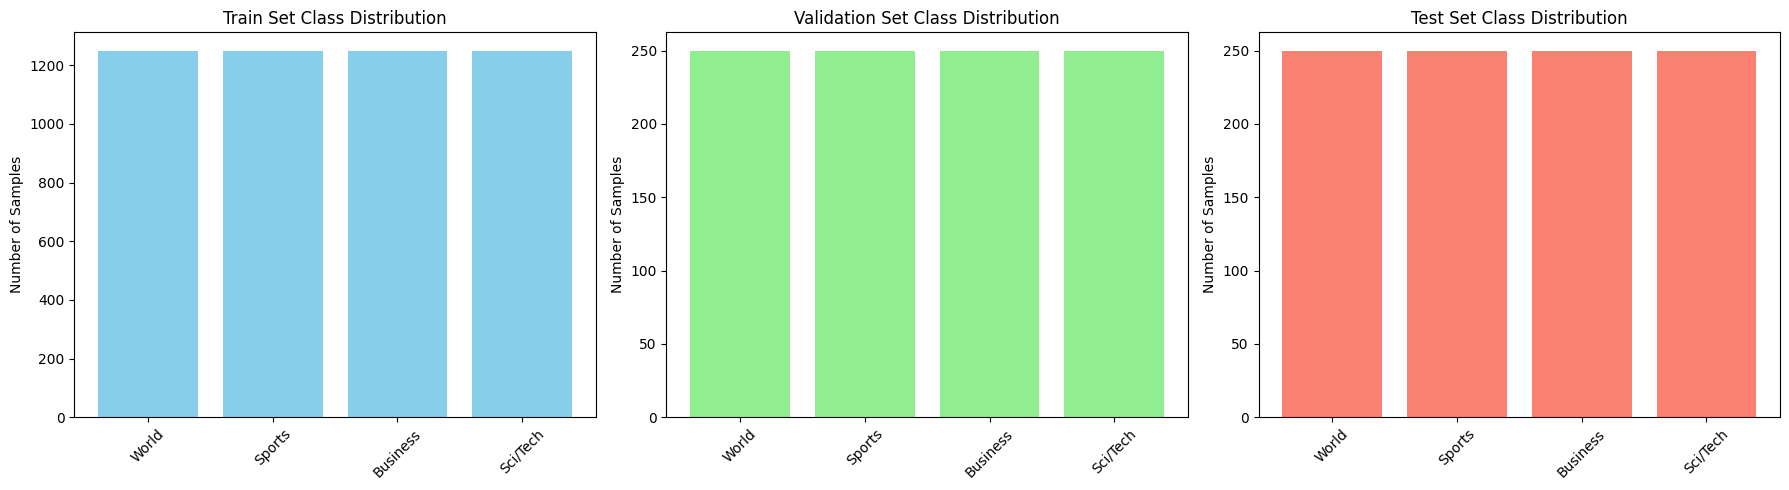

In [81]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

train_counts = train_data['label'].value_counts().sort_index()
axes[0].bar([class_names[i] for i in train_counts.index], train_counts.values, color='skyblue')
axes[0].set_title('Train Set Class Distribution')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=45)

valid_counts = valid_data['label'].value_counts().sort_index()
axes[1].bar([class_names[i] for i in valid_counts.index], valid_counts.values, color='lightgreen')
axes[1].set_title('Validation Set Class Distribution')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)

test_counts = test_data['label'].value_counts().sort_index()
axes[2].bar([class_names[i] for i in test_counts.index], test_counts.values, color='salmon')
axes[2].set_title('Test Set Class Distribution')
axes[2].set_ylabel('Number of Samples')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Misclassified Examples

In [82]:
misclassified_indices = [i for i, (true, pred) in enumerate(zip(test_labels_list, test_preds)) if true != pred]
print(f"Number of misclassified samples: {len(misclassified_indices)}\n")

print("Examples of misclassified texts:")
for idx in misclassified_indices[:5]:
    true_label = class_names[test_labels_list[idx]]
    pred_label = class_names[test_preds[idx]]
    text = test_texts[idx][:200] + "..." if len(test_texts[idx]) > 200 else test_texts[idx]
    print(f"True: {true_label}, Predicted: {pred_label}")
    print(f"Text: {text}")
    print("-" * 80)

Number of misclassified samples: 147

Examples of misclassified texts:
True: Sports, Predicted: Sci/Tech
Text: minutemen ko'd by dukes harrisonburg, va. -- opposing running backs are beginning to enjoy playing against the university of massachusetts.
--------------------------------------------------------------------------------
True: World, Predicted: Sci/Tech
Text: fda approves lens implant to sharpen sight washington - there's a new option for people who suffer from extreme nearsightedness, whose world loses its crisp edge just a few inches from their noses. th...
--------------------------------------------------------------------------------
True: World, Predicted: Sci/Tech
Text: renault unveils investment plan for asian hub in south korea (afp) afp - french auto giant renault sa said it will invest some 570 million dollars in south korea over the next three years as part of i...
--------------------------------------------------------------------------------
True: Business, Pred

### t-SNE of Embeddings

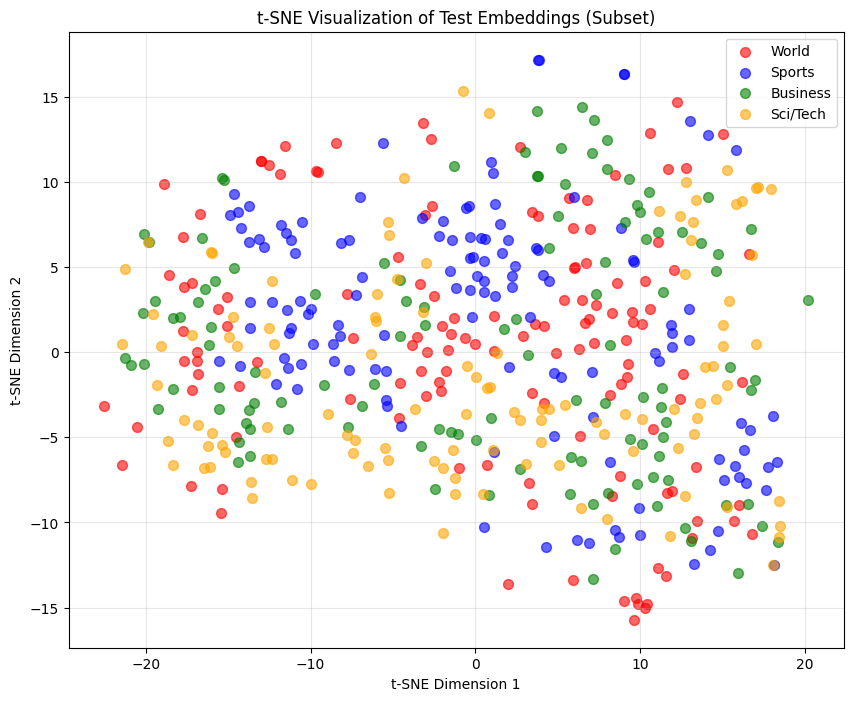

In [85]:
from sklearn.manifold import TSNE
import numpy as np

subset_size = 500
indices = np.random.choice(len(test_embeddings), subset_size, replace=False)
subset_embeddings = [test_embeddings[i] for i in indices]
subset_labels = [test_labels_list[i] for i in indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(np.array(subset_embeddings))

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange']
for label in range(4):
    mask = np.array(subset_labels) == label
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                c=colors[label], label=class_names[label], alpha=0.6, s=50)

plt.title('t-SNE Visualization of Test Embeddings (Subset)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Training Curves

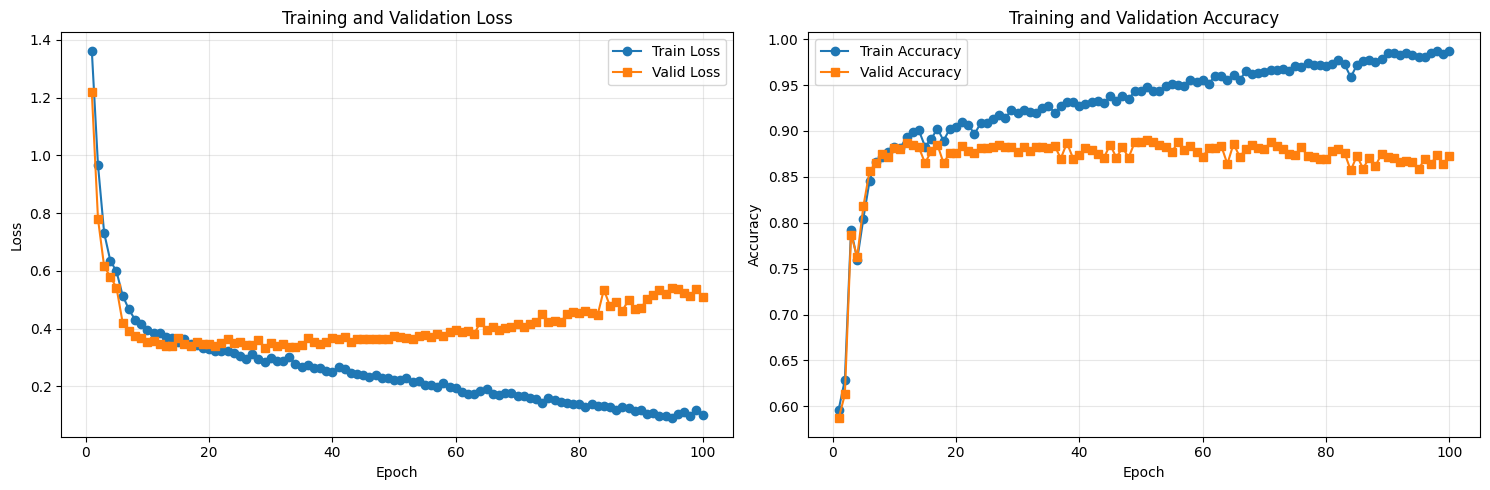

In [86]:
epochs_range = range(1, len(train_losses) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(epochs_range, train_losses, label='Train Loss', marker='o')
axes[0].plot(epochs_range, valid_losses, label='Valid Loss', marker='s')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
axes[1].plot(epochs_range, valid_accuracies, label='Valid Accuracy', marker='s')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Per-Class Metrics

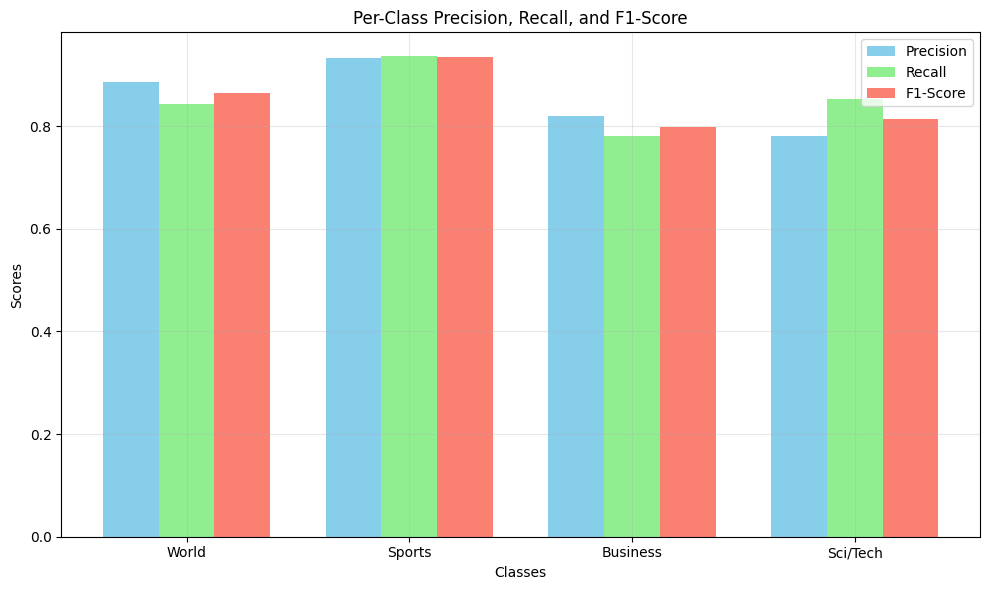

In [87]:
from sklearn.metrics import classification_report

report = classification_report(test_labels_list, test_preds, target_names=class_names.values(), output_dict=True)
classes = list(class_names.values())
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1 = [report[cls]['f1-score'] for cls in classes]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Precision', color='skyblue')
ax.bar(x, recall, width, label='Recall', color='lightgreen')
ax.bar(x + width, f1, width, label='F1-Score', color='salmon')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Per-Class Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Text Length vs Correctness

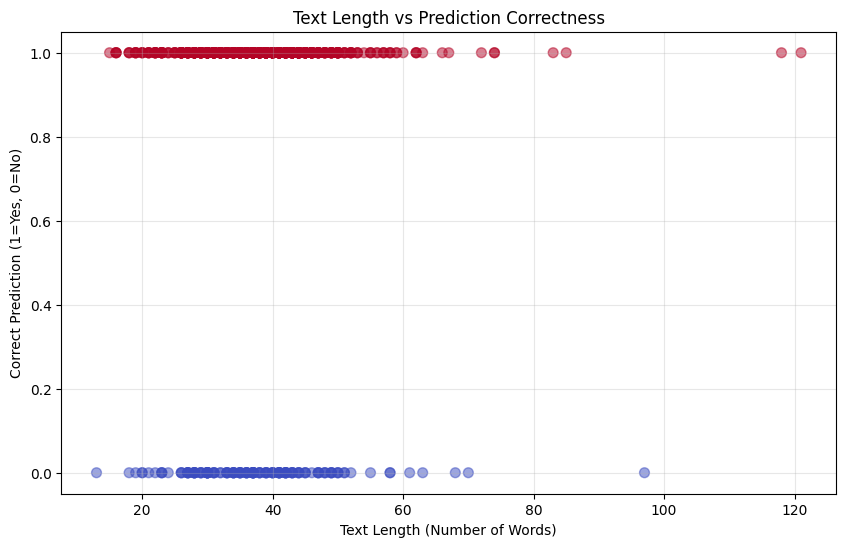

Average text length for correct predictions: 37.6
Average text length for incorrect predictions: 37.6


In [88]:
test_lengths = [len(text.split()) for text in test_texts]
correct = [1 if pred == true else 0 for pred, true in zip(test_preds, test_labels_list)]

plt.figure(figsize=(10, 6))
plt.scatter(test_lengths, correct, alpha=0.5, c=correct, cmap='coolwarm', s=50)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Correct Prediction (1=Yes, 0=No)')
plt.title('Text Length vs Prediction Correctness')
plt.grid(True, alpha=0.3)
plt.show()

correct_lengths = [test_lengths[i] for i in range(len(test_lengths)) if correct[i] == 1]
incorrect_lengths = [test_lengths[i] for i in range(len(test_lengths)) if correct[i] == 0]

print(f"Average text length for correct predictions: {np.mean(correct_lengths):.1f}")
print(f"Average text length for incorrect predictions: {np.mean(incorrect_lengths):.1f}")

<div dir='rtl' style="line-height: 2.0; text-align: right; font-family: Vazir; font-size: 16px; margin-top: 20px; color: white; background-color:rgb(0, 40, 30); padding: 30px; border-radius: 8px;">
🎯 <b>خروجی مورد انتظار:</b><br>
<ul>
    <li>
    متریک‌های گفته‌شده
    </li>
    <li>
    تحلیل نتایج
    </li>
</ul>
</div>

# <h1 style="text-align: right;">**نکات مهم و قوانین تحویل**</h1>


<h4 dir="rtl" style="font-family: Vazir; width: 85%;">فایل ارسالی شما باید با فرمت زیر نامگذاری شود: <code>NLP_CA{n}_{LASTNAME}_{STUDENTID}.ipynb</code></h4>
<h4 dir="rtl" style="font-family: Vazir; width: 85%;">نحوه انجام تمرین:</h4>
<ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
  <li>سلول‌های کد با برچسب <code>WRITE YOUR CODE HERE</code> را تکمیل کنید.</li>
  <li>برای پاسخ‌های متنی، متن <code>{{پاسخ_خود_را_اینجا_بنویسید}}</code> را با پاسخ خود جایگزین کنید.</li>
</ul>
<h4 dir="rtl" style="font-family: Vazir; width: 85%;">صداقت علمی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;"> <li>ما نوت‌بوک‌های تعداد مشخصی از دانشجویان که به صورت تصادفی انتخاب می‌شوند، بررسی خواهیم کرد. این بررسی‌ها اطمینان حاصل می‌کنند که کدی که نوشتید واقعاً پاسخ‌های موجود در نوت‌بوک شما را تولید می‌کند. اگر پاسخ‌های صحیح را در نوت‌بوک خود بدون کدی که واقعاً آن پاسخ‌ها را تولید کند تحویل دهید، این یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> <li>ما همچنین بررسی‌های خودکاری را برای تشخیص سرقت علمی در نوت‌بوک‌های کولب انجام خواهیم داد. کپی کردن کد از دیگران نیز یک مورد جدی از عدم صداقت علمی محسوب می‌شود.</li> </ul>
<h4 dir="rtl" style="font-family: Vazir; width: 85%;">توضیحات تکمیلی:</h4> <ul dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
<li>
خوانایی و دقت بررسی‌ها در گزارش نهایی از اهمیت ویژه‌ای برخوردار است. به تمرین‌هایی که به صورت کاغذی تحویل داده شوند یا به صورت عکس در سایت بارگذاری شوند، ترتیب اثری داده نخواهد شد.</li>
<li>
 همه‌ی کدهای پیوست گزارش بایستی قابلیت اجرای مجدد داشته باشند. در صورتی که برای اجرا مجدد آن‌ها نیاز به تنظیمات خاصی می‌باشد، بایستی تنظیمات مورد نیاز را نیز در گزارش خود ذکر کنید.  دقت کنید که  تمامی کدها باید توسط شما اجرا شده باشند و نتایج اجرا در فایل کدهای ارسالی مشخص باشد. به کدهایی که نتایج اجرای آن‌ها در فایل ارسالی مشخص نباشد نمره‌ای تعلق نمی‌گیرد.
</li>
<li>توجه کنید این تمرین باید به صورت تک‌نفره انجام شود و پاسخ‌های ارائه شده باید نتیجه فعالیت فرد نویسنده باشد (همفکری و به اتفاق هم نوشتن تمرین نیز ممنوع است). در صورت مشاهده
 تشابه به همه افراد مشارکت‌کننده، نمره تمرین صفر و به استاد گزارش می‌گردد.
 </li>

 <li>
لطفاً تمامی پاسخ‌های متنی خود را با <b>فونت وزیر (Vazir)</b> و به‌صورت <b>راست‌چین</b> بنویسید.  
از استفاده از فونت‌های پیش‌فرض خودداری کنید تا ظاهر نوت‌بوک شما یک‌دست و خوانا باشد.  
در بخش‌های تشریحی، سعی کنید پاسخ‌ها را کامل، منسجم و با رعایت نگارش فارسی بنویسید.  
همچنین، به چینش تمیز سلول‌ها و اجرای درست کدها توجه کنید تا تمرین شما با فرمت خواسته‌شده و استاندارد ارائه شود.
</li>
 <li>برای مطالعه بیشتر درباره‌ی فرمت Markdown می‌توانید از <a href="https://github.com/tajaddini/Persian-Markdown/blob/master/learn-MD.md">این لینک</a> مطالعه کنید.
 </li>
 </ul>
    

 </div>
